
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

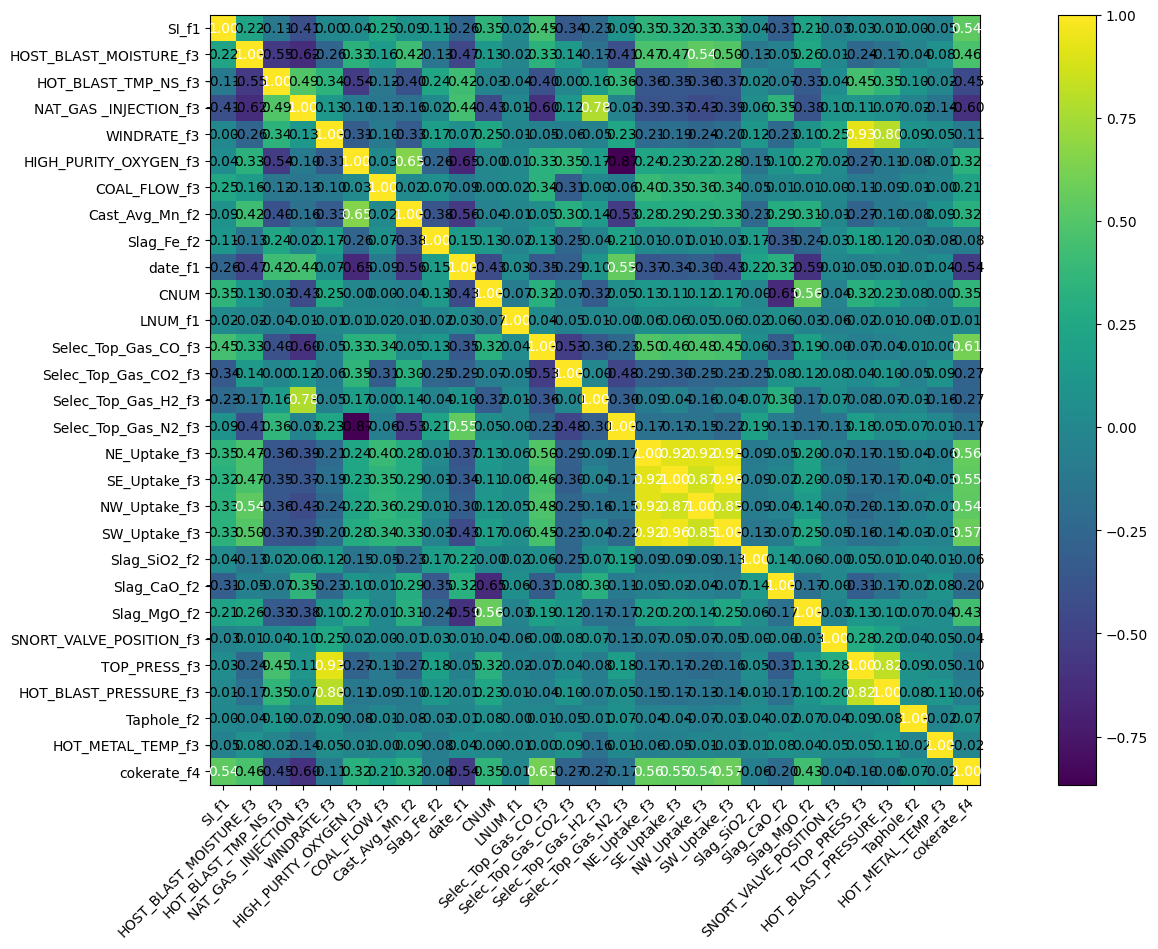

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

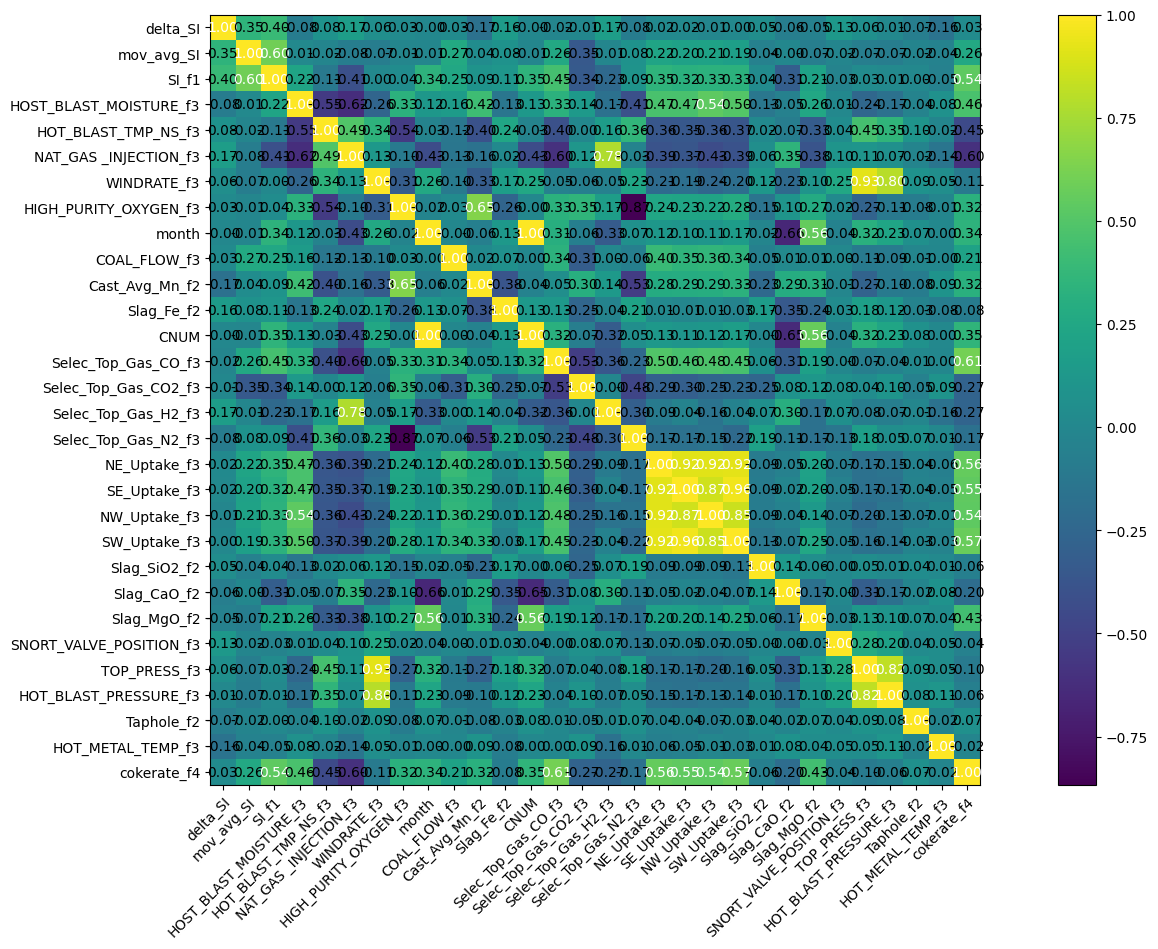

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.602242
Loss_SI: 0.5549575686454773 Loss_all: 1.0278018712997437
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.145544
Loss_SI: 0.08496972173452377 Loss_all: 0.690712034702301
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.069813
Loss_SI: 0.023908190429210663 Loss_all: 0.48295149207115173
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.046822
Loss_SI: 0.011207533068954945 Loss_all: 0.36734774708747864
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.040124
Loss_SI: 0.009223826229572296 Loss_all: 0.31822970509529114
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.038808
Loss_SI: 0.013270351104438305 Loss_all: 0.2686429023742676
Prediction shape: torch.Size([32, 35])
===


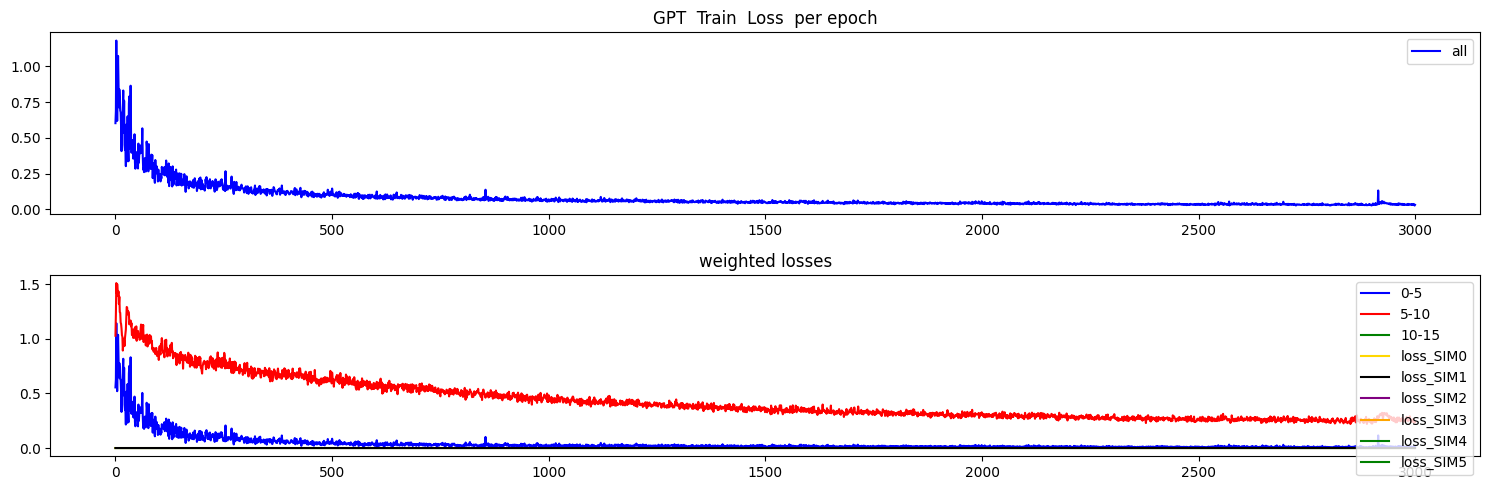

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


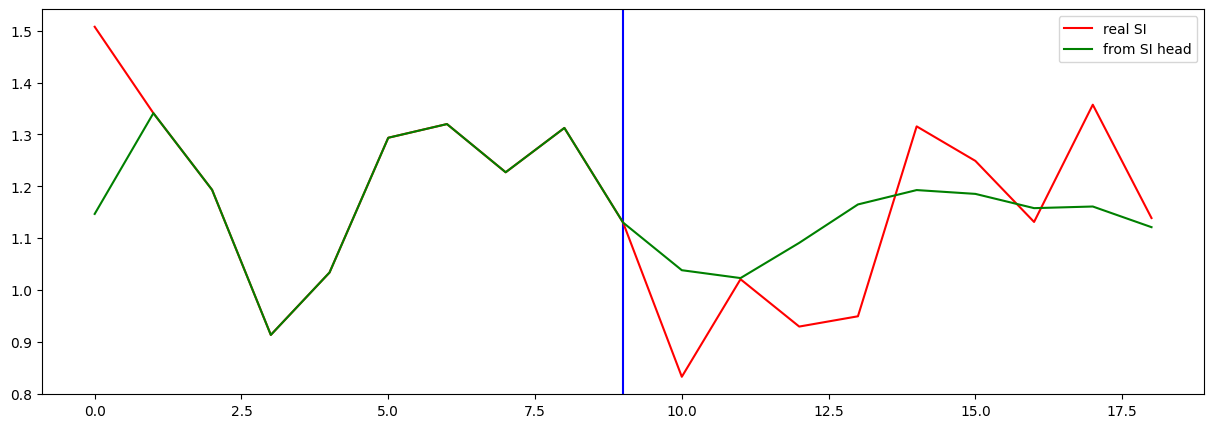

Testing R**2 - (all) - (no inputs):  0.9859789316388833
Testing R**2 - (f2) - SI full (no inputs):  0.10669738734819201
Testing R**2 - SI head only (no inputs):  0.19451942057137572
0 ...index R**2 (no inputs):  -0.7891824976205621
1 ...index R**2 (no inputs):  -0.05491893959492411
2 ...index R**2 (no inputs):  0.10669738734819201
3 ...index R**2 (no inputs):  -16.16605090424585
4 ...index R**2 (no inputs):  -2.3609421692928096
5 ...index R**2 (no inputs):  -39.10169366106399
6 ...index R**2 (no inputs):  -3.4967304297757558
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6414899028233951
10 ...index R**2 (no inputs):  -0.14175104616300294
11 ...index R**2 (no inputs):  -13.57949428006253
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0614078169120509
16 ...index R**2 (no inputs):  -1.165466180895058
17 ...index R**2 (no inputs):  -13.03246296

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.441468
Loss_SI: 0.38755255937576294 Loss_all: 0.9267113208770752
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.159185
Loss_SI: 0.11231964081525803 Loss_all: 0.5809708833694458
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.118559
Loss_SI: 0.0735495388507843 Loss_all: 0.5236434936523438
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.074457
Loss_SI: 0.03582700341939926 Loss_all: 0.42212942242622375
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.076395
Loss_SI: 0.03374546766281128 Loss_all: 0.46023985743522644
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.050184
Loss_SI: 0.01407315582036972 Loss_all: 0.3751782178878784
Prediction shape: torch.Size([32, 35])
===


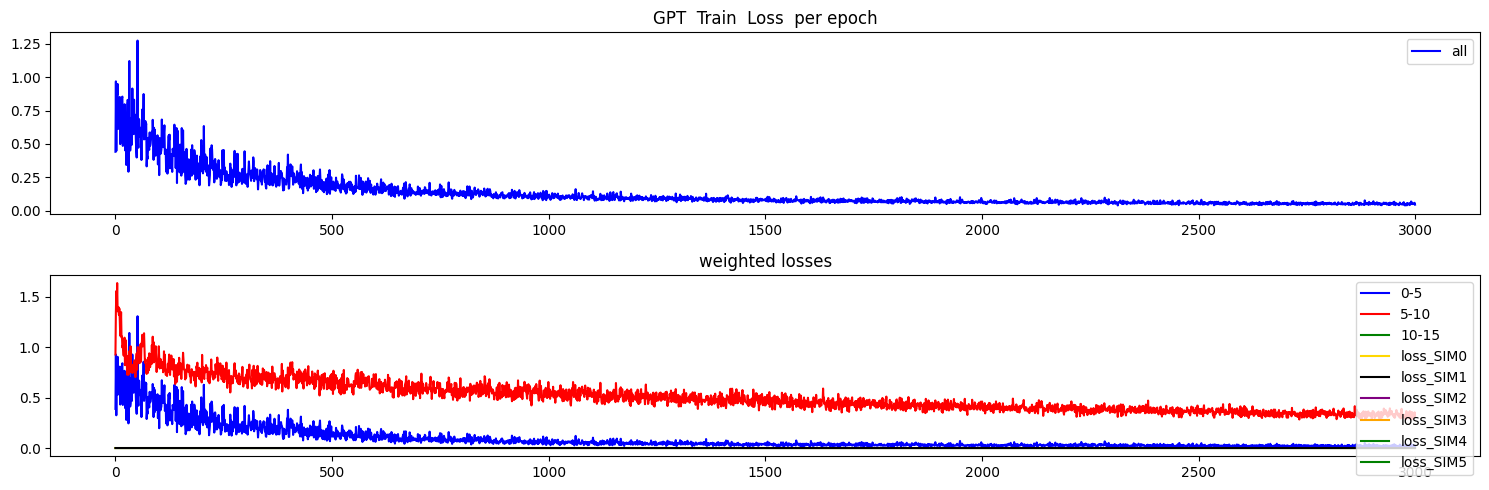

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


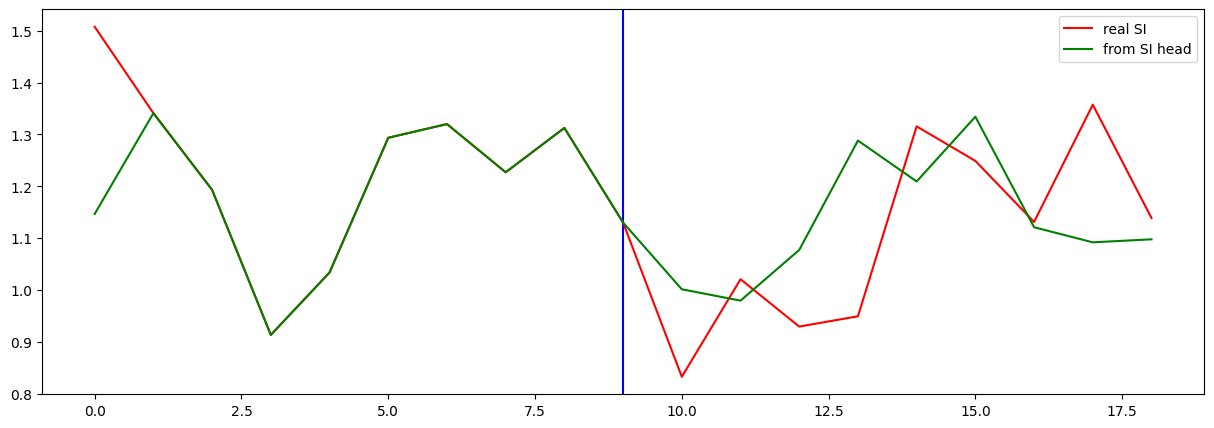

Testing R**2 - (all) - (no inputs):  0.9836279082239441
Testing R**2 - (f2) - SI full (no inputs):  0.25833390037983084
Testing R**2 - SI head only (no inputs):  0.06021867215772558
0 ...index R**2 (no inputs):  0.21726781957071928
1 ...index R**2 (no inputs):  -0.6235981101604635
2 ...index R**2 (no inputs):  0.25833390037983084
3 ...index R**2 (no inputs):  -1738.318194401953
4 ...index R**2 (no inputs):  -120.11196974269832
5 ...index R**2 (no inputs):  -45.752686074598905
6 ...index R**2 (no inputs):  -6.716537737292313
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39631644315102843
10 ...index R**2 (no inputs):  -0.9163159709809083
11 ...index R**2 (no inputs):  -77.29934595505664
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5519101375109492
16 ...index R**2 (no inputs):  -7.193771015048071
17 ...index R**2 (no inputs):  -41.419000825

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.747677
Loss_SI: 0.6827532649040222 Loss_all: 1.331992506980896
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.295302
Loss_SI: 0.23167143762111664 Loss_all: 0.8679786920547485
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.115593
Loss_SI: 0.05733463168144226 Loss_all: 0.6399164199829102
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.128825
Loss_SI: 0.0816994458436966 Loss_all: 0.5529553890228271
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.071935
Loss_SI: 0.024671519175171852 Loss_all: 0.4973101019859314
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076596
Loss_SI: 0.03323590010404587 Loss_all: 0.46683260798454285
Prediction shape: torch.Size([32, 35])
===


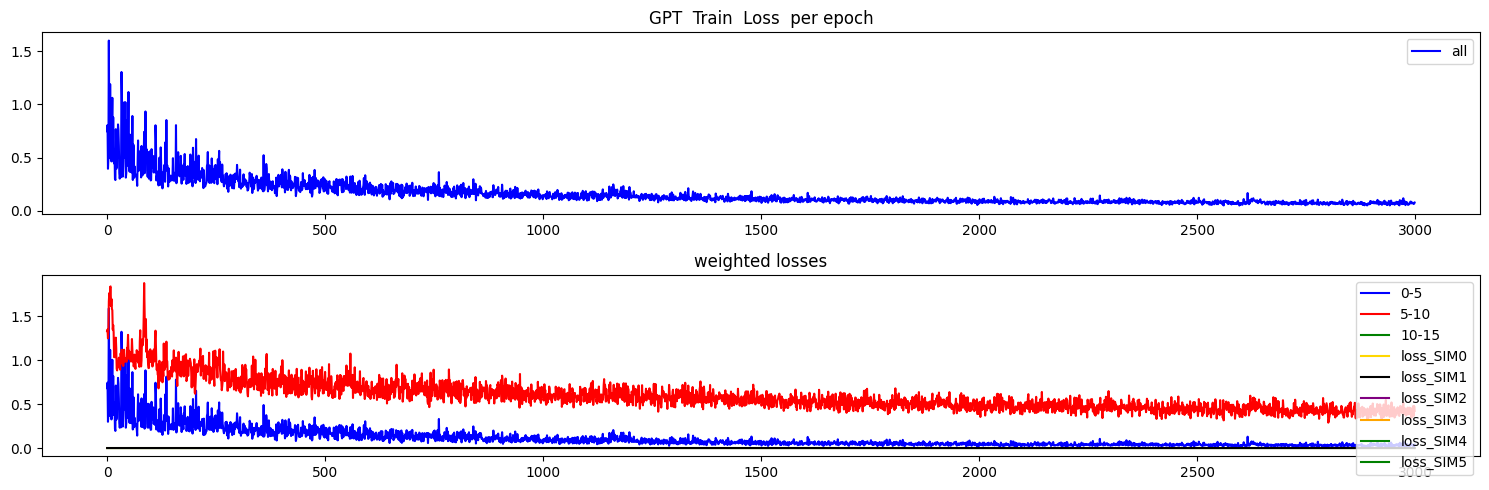

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


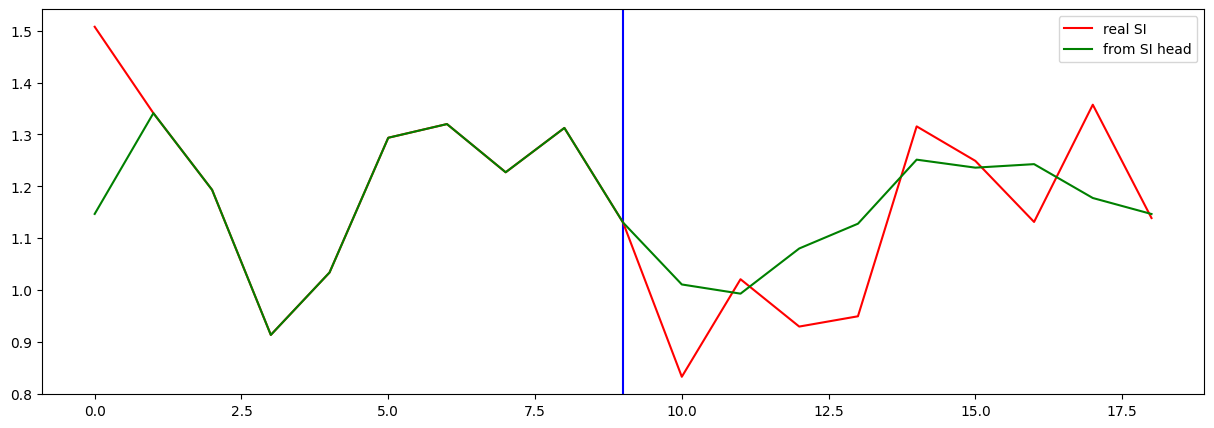

Testing R**2 - (all) - (no inputs):  0.992644375754124
Testing R**2 - (f2) - SI full (no inputs):  0.30635528423186775
Testing R**2 - SI head only (no inputs):  0.3086998467089406
0 ...index R**2 (no inputs):  -0.4265986278884566
1 ...index R**2 (no inputs):  0.027081094788146798
2 ...index R**2 (no inputs):  0.30635528423186775
3 ...index R**2 (no inputs):  -240.67185431933774
4 ...index R**2 (no inputs):  -59.658227621377634
5 ...index R**2 (no inputs):  -19.943332071809976
6 ...index R**2 (no inputs):  -2.385695554656291
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7172482986422657
10 ...index R**2 (no inputs):  -0.2580217891798602
11 ...index R**2 (no inputs):  -40.63048407024494
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.3151529888920076
16 ...index R**2 (no inputs):  -5.919329421494677
17 ...index R**2 (no inputs):  -27.49677526544

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.505893
Loss_SI: 0.4282606840133667 Loss_all: 1.2045814990997314
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.320550
Loss_SI: 0.27221158146858215 Loss_all: 0.7555925846099854
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.228860
Loss_SI: 0.17244140803813934 Loss_all: 0.7366295456886292
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.183714
Loss_SI: 0.13636231422424316 Loss_all: 0.6098776459693909
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.109444
Loss_SI: 0.06523200869560242 Loss_all: 0.5073513984680176
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.105002
Loss_SI: 0.06897341459989548 Loss_all: 0.4292593002319336
Prediction shape: torch.Size([32, 35])
===


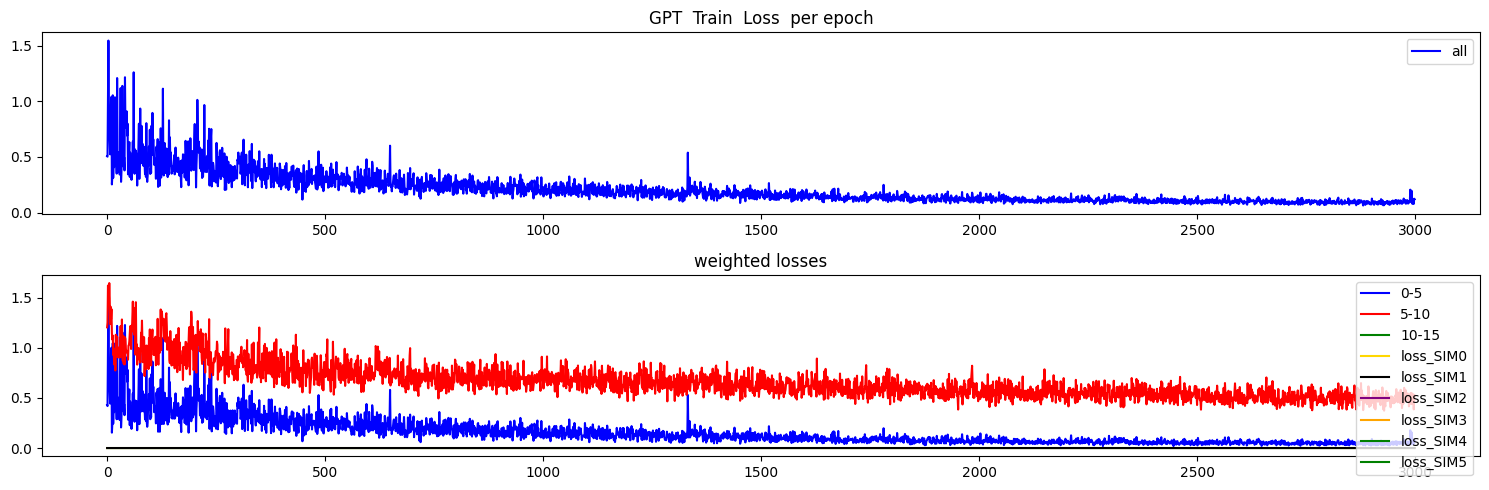

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


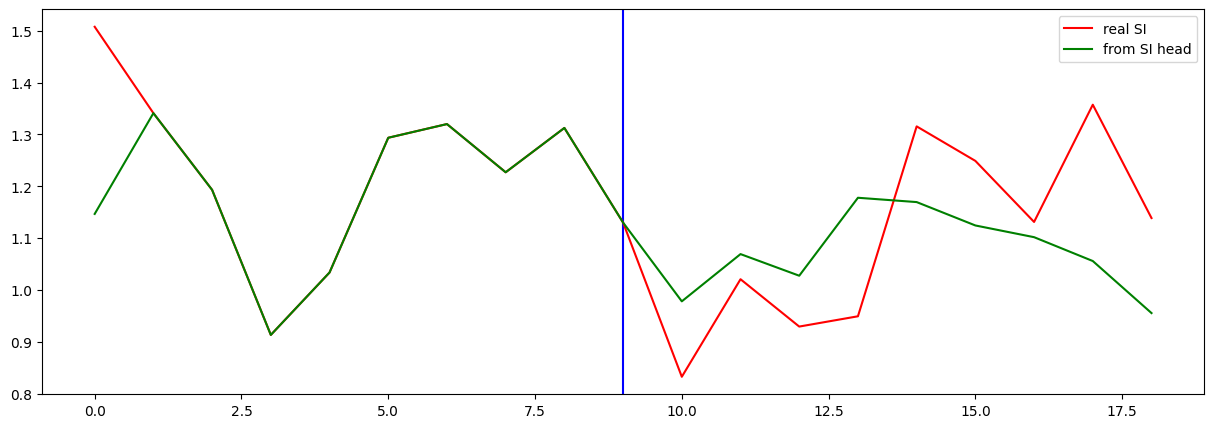

Testing R**2 - (all) - (no inputs):  0.9574940474608997
Testing R**2 - (f2) - SI full (no inputs):  -2.707131033672892
Testing R**2 - SI head only (no inputs):  -0.3986125757987029
0 ...index R**2 (no inputs):  -0.2638304615014557
1 ...index R**2 (no inputs):  -0.3206432570855422
2 ...index R**2 (no inputs):  -2.707131033672892
3 ...index R**2 (no inputs):  -8626.143976451525
4 ...index R**2 (no inputs):  -59.57835696369331
5 ...index R**2 (no inputs):  -120.67337609244751
6 ...index R**2 (no inputs):  -7.834341509997458
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.17399860420823687
10 ...index R**2 (no inputs):  0.2846505838888098
11 ...index R**2 (no inputs):  -407.4700473617024
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10763986138690362
16 ...index R**2 (no inputs):  -1.0530810478894201
17 ...index R**2 (no inputs):  -37.85509614713

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.874907
Loss_SI: 0.844287097454071 Loss_all: 1.1504874229431152
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.091372
Loss_SI: 0.03308616578578949 Loss_all: 0.6159460544586182
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.070434
Loss_SI: 0.024776756763458252 Loss_all: 0.4813452959060669
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.040595
Loss_SI: 0.009673687629401684 Loss_all: 0.3188905417919159
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.050342
Loss_SI: 0.017563441768288612 Loss_all: 0.34535008668899536
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.034124
Loss_SI: 0.006784874014556408 Loss_all: 0.2801775336265564
Prediction shape: torch.Size([32, 35])
===


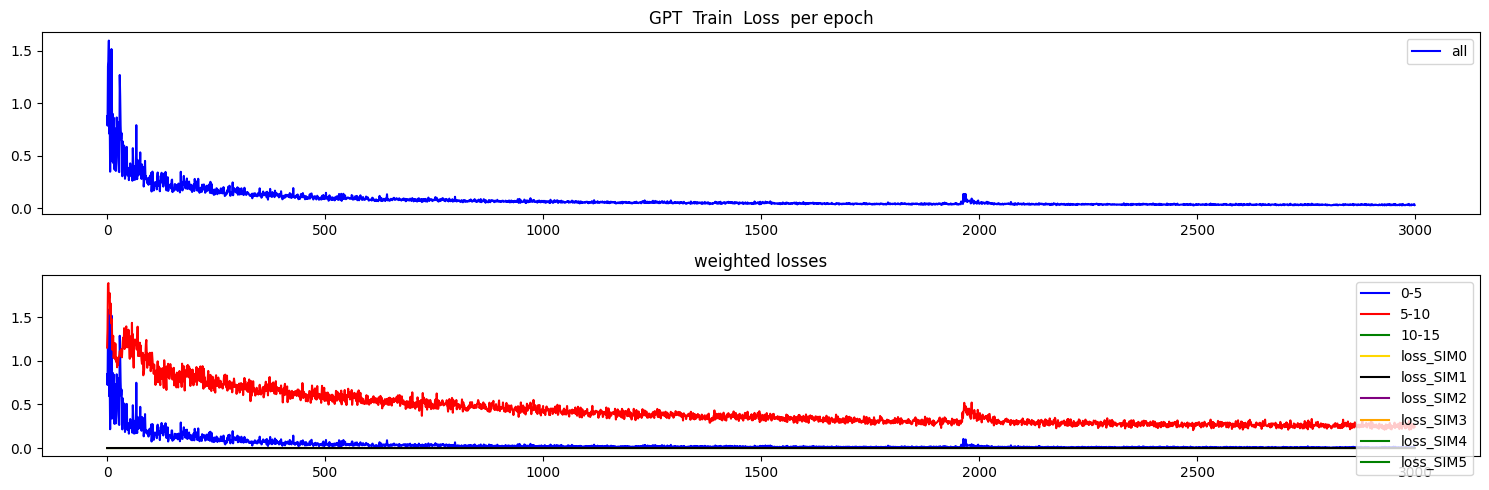

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


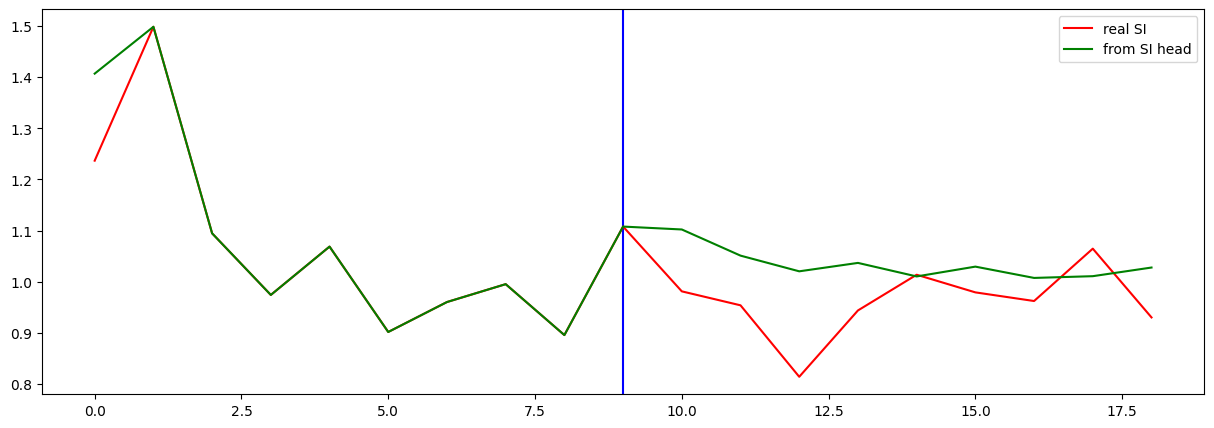

Testing R**2 - (all) - (no inputs):  0.9859346319839016
Testing R**2 - (f2) - SI full (no inputs):  -0.13394696606010648
Testing R**2 - SI head only (no inputs):  -0.35560482881601985
0 ...index R**2 (no inputs):  -0.1171147489593678
1 ...index R**2 (no inputs):  -1.3410762196777903
2 ...index R**2 (no inputs):  -0.13394696606010648
3 ...index R**2 (no inputs):  -57.84893797675284
4 ...index R**2 (no inputs):  -6157.086137849922
5 ...index R**2 (no inputs):  -13.698587470856074
6 ...index R**2 (no inputs):  -0.590499871613648
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2418443830989667
10 ...index R**2 (no inputs):  -0.05281533273062222
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.829458876895615
16 ...index R**2 (no inputs):  -0.22183528413392817
17 ...index R**2 (no inputs):  -2.0702779960081075
18 ..

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.422992
Loss_SI: 0.34275293350219727 Loss_all: 1.1451447010040283
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.138787
Loss_SI: 0.07113419473171234 Loss_all: 0.7476668953895569
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.089444
Loss_SI: 0.04248514398932457 Loss_all: 0.5120747685432434
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085137
Loss_SI: 0.037189632654190063 Loss_all: 0.5166667103767395
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068678
Loss_SI: 0.023778021335601807 Loss_all: 0.47277364134788513
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.069763
Loss_SI: 0.033948980271816254 Loss_all: 0.3920847773551941
Prediction shape: torch.Size([32, 35])
===


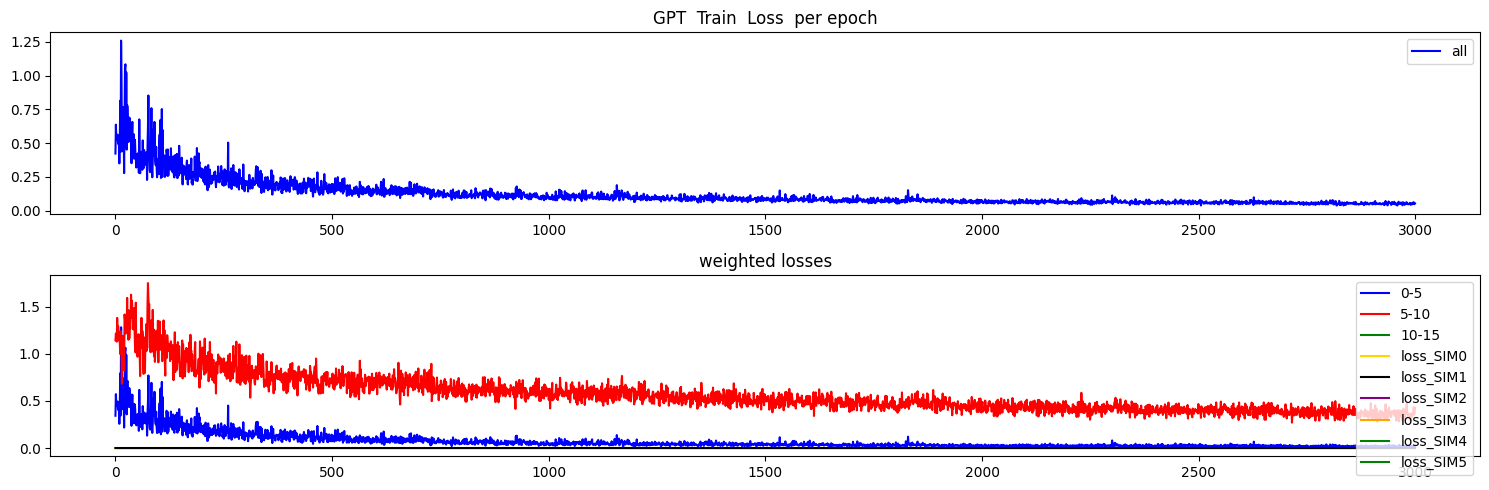

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


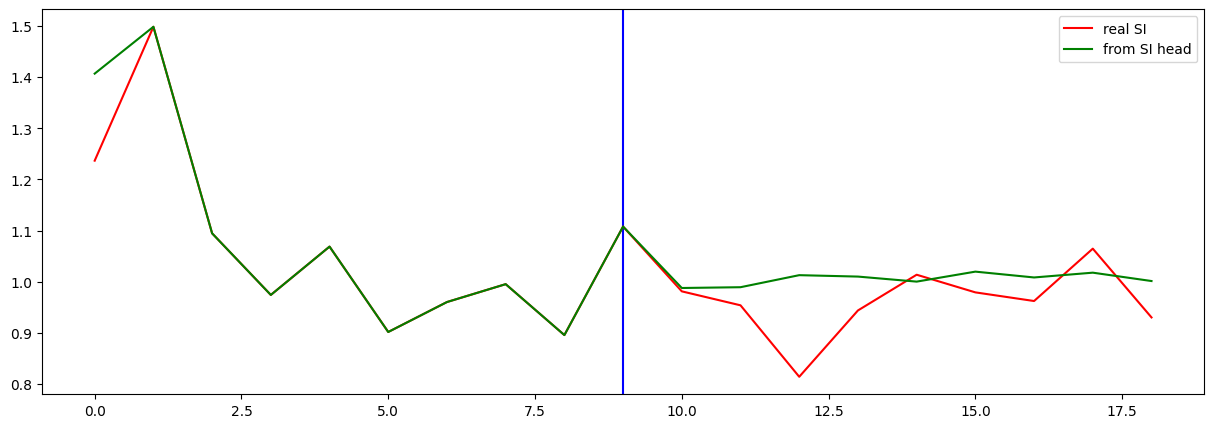

Testing R**2 - (all) - (no inputs):  0.9741956811569926
Testing R**2 - (f2) - SI full (no inputs):  -0.1267821639053932
Testing R**2 - SI head only (no inputs):  -0.007088109268851728
0 ...index R**2 (no inputs):  -0.9156441587164508
1 ...index R**2 (no inputs):  -3.2588690786890275
2 ...index R**2 (no inputs):  -0.1267821639053932
3 ...index R**2 (no inputs):  -70.13228212454418
4 ...index R**2 (no inputs):  -2037.5398834606694
5 ...index R**2 (no inputs):  -26.337939655684412
6 ...index R**2 (no inputs):  -0.9863799930075539
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39797171175376445
10 ...index R**2 (no inputs):  -0.4064736695570419
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7039620535788182
16 ...index R**2 (no inputs):  -0.3798389056293754
17 ...index R**2 (no inputs):  -32.36062698252221
18 ..

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.485259
Loss_SI: 1.50576651096344 Loss_all: 1.3006905317306519
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.258273
Loss_SI: 0.19561296701431274 Loss_all: 0.8222103118896484
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.190056
Loss_SI: 0.131272092461586 Loss_all: 0.7191147208213806
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.124037
Loss_SI: 0.06121096760034561 Loss_all: 0.6894705891609192
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.112007
Loss_SI: 0.047411948442459106 Loss_all: 0.6933621168136597
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.073699
Loss_SI: 0.02669169008731842 Loss_all: 0.49676817655563354
Prediction shape: torch.Size([32, 35])
===


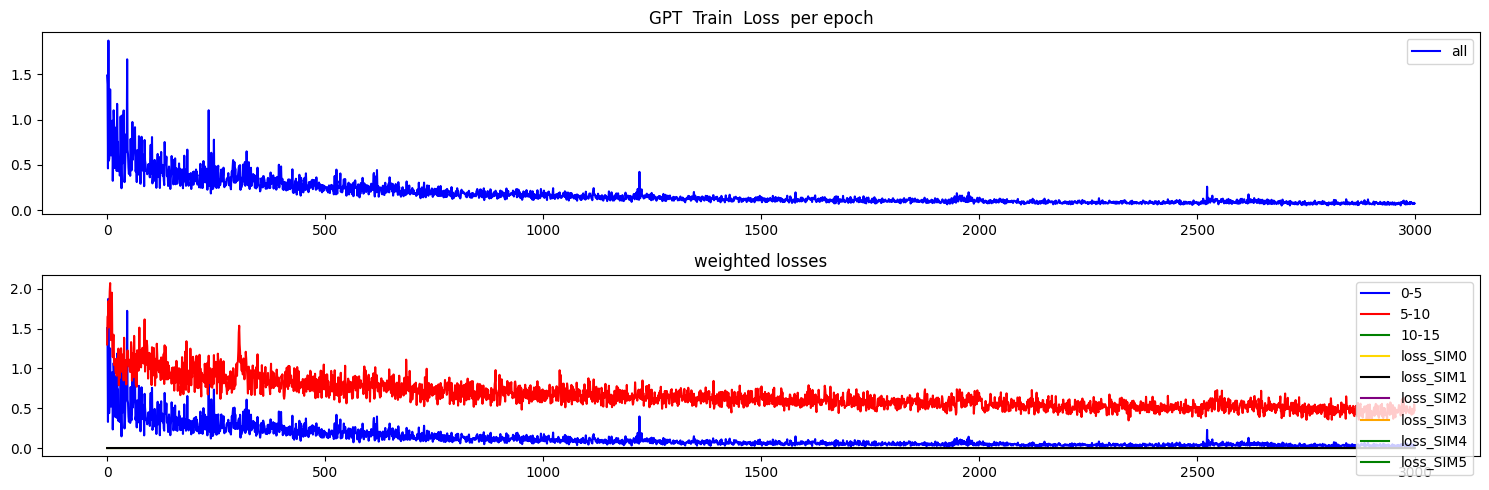

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


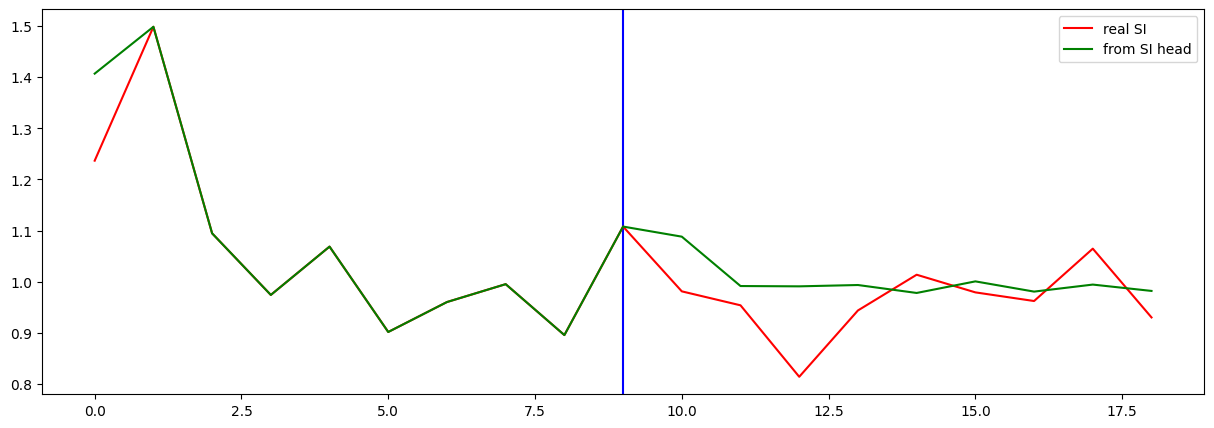

Testing R**2 - (all) - (no inputs):  0.9937705833095682
Testing R**2 - (f2) - SI full (no inputs):  -1.8678895802141868
Testing R**2 - SI head only (no inputs):  -0.22534218755485802
0 ...index R**2 (no inputs):  -0.030718823857027067
1 ...index R**2 (no inputs):  -5.726457693198377
2 ...index R**2 (no inputs):  -1.8678895802141868
3 ...index R**2 (no inputs):  -568.83622761278
4 ...index R**2 (no inputs):  -12030.546508151197
5 ...index R**2 (no inputs):  -5.34082169116085
6 ...index R**2 (no inputs):  -1.6288435834154584
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.060181536670870894
10 ...index R**2 (no inputs):  -0.30050927239921177
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8206012379532652
16 ...index R**2 (no inputs):  -1.716691343506278
17 ...index R**2 (no inputs):  -137.09199818219878
18 ...i

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.707584
Loss_SI: 0.5895990133285522 Loss_all: 1.7694530487060547
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.260875
Loss_SI: 0.1759934276342392 Loss_all: 1.0248067378997803
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.196708
Loss_SI: 0.12400834262371063 Loss_all: 0.8510044813156128
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.130950
Loss_SI: 0.0740857720375061 Loss_all: 0.6427291035652161
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.154725
Loss_SI: 0.09685591608285904 Loss_all: 0.6755496263504028
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.103928
Loss_SI: 0.048071641474962234 Loss_all: 0.606635570526123
Prediction shape: torch.Size([32, 35])
===


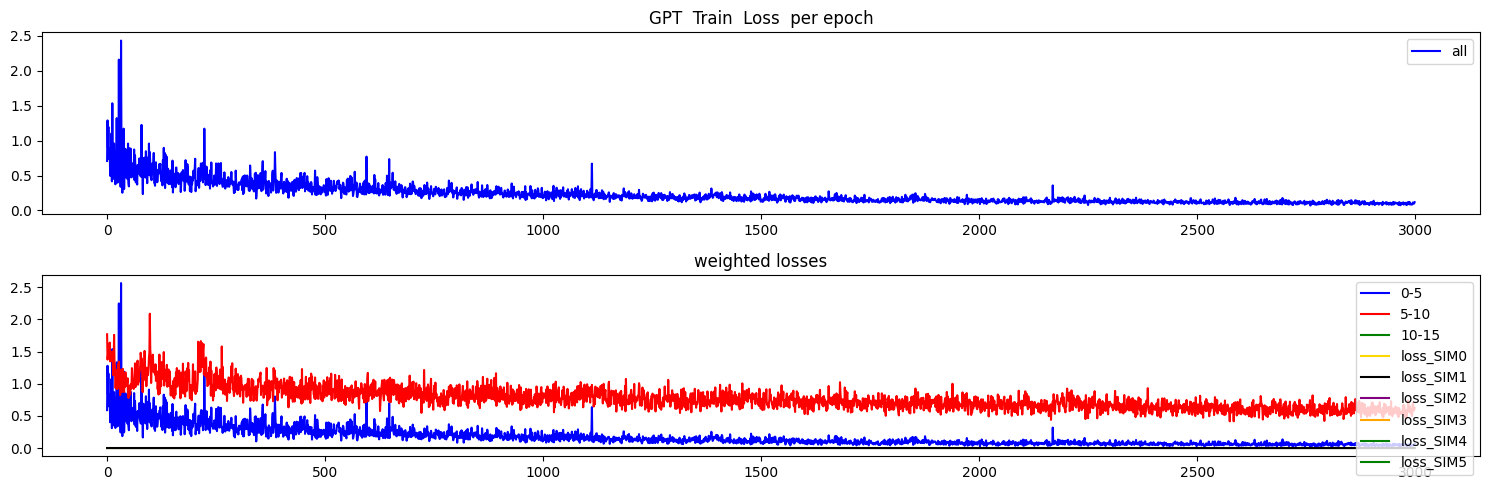

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


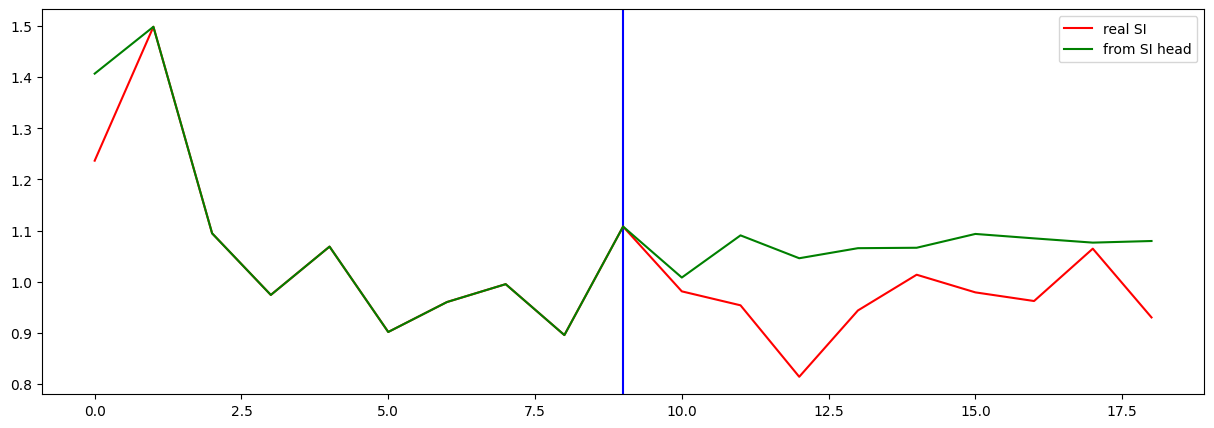

Testing R**2 - (all) - (no inputs):  0.9924551719125565
Testing R**2 - (f2) - SI full (no inputs):  -0.7118658702049183
Testing R**2 - SI head only (no inputs):  -0.5481760325792402
0 ...index R**2 (no inputs):  -0.6283046444371381
1 ...index R**2 (no inputs):  -3.3415396067394116
2 ...index R**2 (no inputs):  -0.7118658702049183
3 ...index R**2 (no inputs):  -584.4961934624168
4 ...index R**2 (no inputs):  -44895.177567229206
5 ...index R**2 (no inputs):  -6.830499385841673
6 ...index R**2 (no inputs):  -1.6978333525222573
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19751837259288463
10 ...index R**2 (no inputs):  -1.113000366186737
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.13480164562172225
16 ...index R**2 (no inputs):  -0.756783812816364
17 ...index R**2 (no inputs):  -18.31726626957562
18 ...ind

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.525360
Loss_SI: 0.45355117321014404 Loss_all: 1.171642780303955
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.108586
Loss_SI: 0.04700621962547302 Loss_all: 0.6628023982048035
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.081984
Loss_SI: 0.03700613975524902 Loss_all: 0.48678824305534363
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.055451
Loss_SI: 0.017185140401124954 Loss_all: 0.39984697103500366
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068036
Loss_SI: 0.02280137501657009 Loss_all: 0.4751449227333069
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.043876
Loss_SI: 0.007993998937308788 Loss_all: 0.36681222915649414
Prediction shape: torch.Size([32, 35])
===


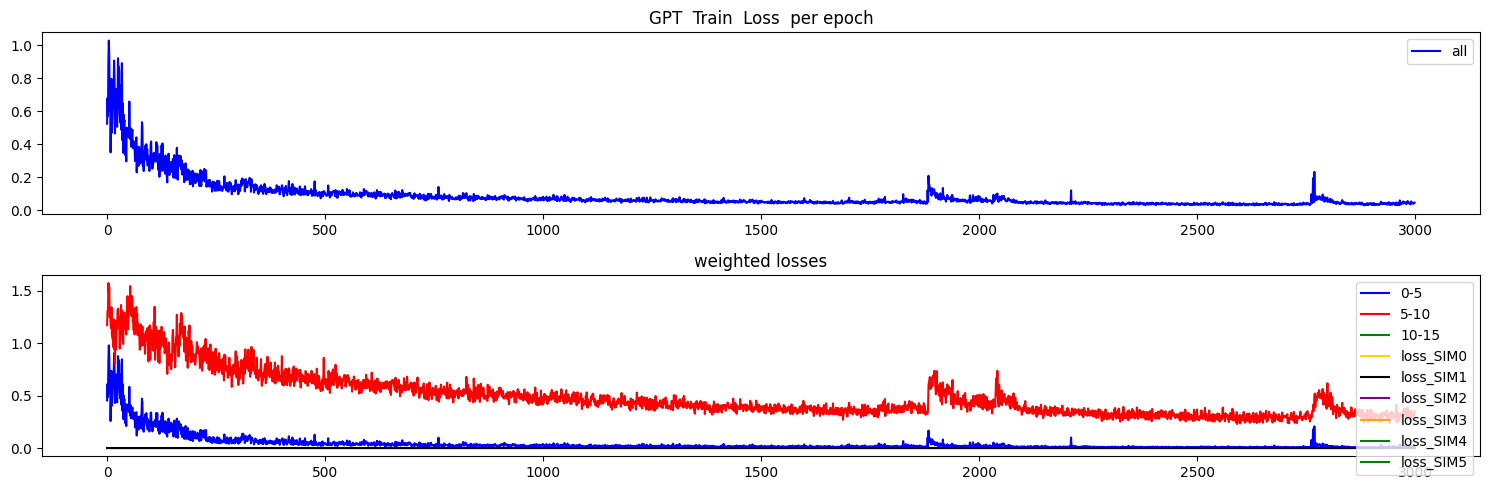

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


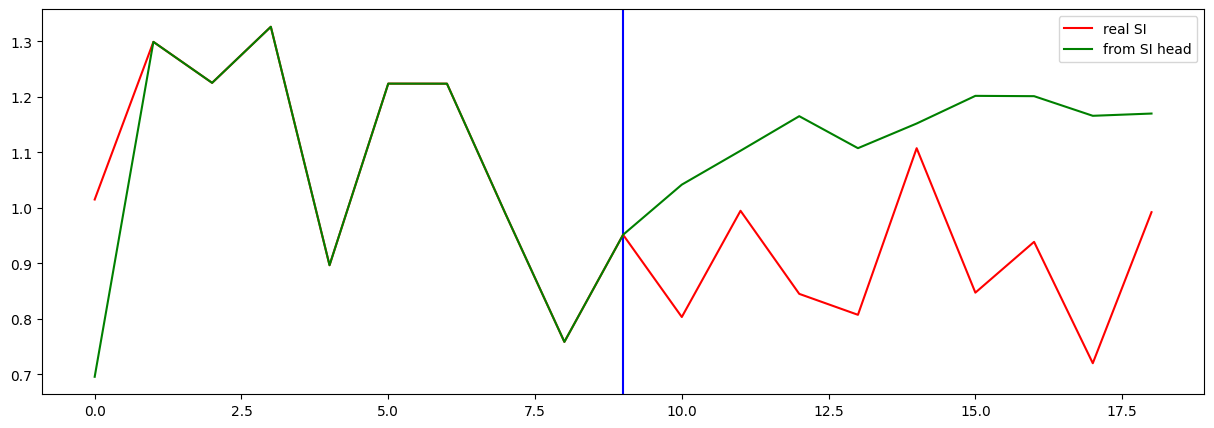

Testing R**2 - (all) - (no inputs):  0.9320291755996915
Testing R**2 - (f2) - SI full (no inputs):  -4.71240148800559
Testing R**2 - SI head only (no inputs):  -4.420391973834826
0 ...index R**2 (no inputs):  -0.020774108786047796
1 ...index R**2 (no inputs):  -1.0575569122468713
2 ...index R**2 (no inputs):  -4.71240148800559
3 ...index R**2 (no inputs):  -30.633970291065932
4 ...index R**2 (no inputs):  -130.02187542145904
5 ...index R**2 (no inputs):  -312.6826591624147
6 ...index R**2 (no inputs):  -601.5259045766878
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.0382098844614243
10 ...index R**2 (no inputs):  -0.5298563733319279
11 ...index R**2 (no inputs):  -59.153057000267324
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.21208177132001
16 ...index R**2 (no inputs):  -0.3351271748341078
17 ...index R**2 (no inputs):  -1.80762059339581

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.570897
Loss_SI: 0.5275121331214905 Loss_all: 0.9613631367683411
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.143472
Loss_SI: 0.06246040761470795 Loss_all: 0.8725772500038147
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.108234
Loss_SI: 0.04800228774547577 Loss_all: 0.6503203511238098
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085806
Loss_SI: 0.02991699054837227 Loss_all: 0.5888054370880127
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.072239
Loss_SI: 0.020863451063632965 Loss_all: 0.5346183776855469
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.066886
Loss_SI: 0.02754087932407856 Loss_all: 0.4209914803504944
Prediction shape: torch.Size([32, 35])
===


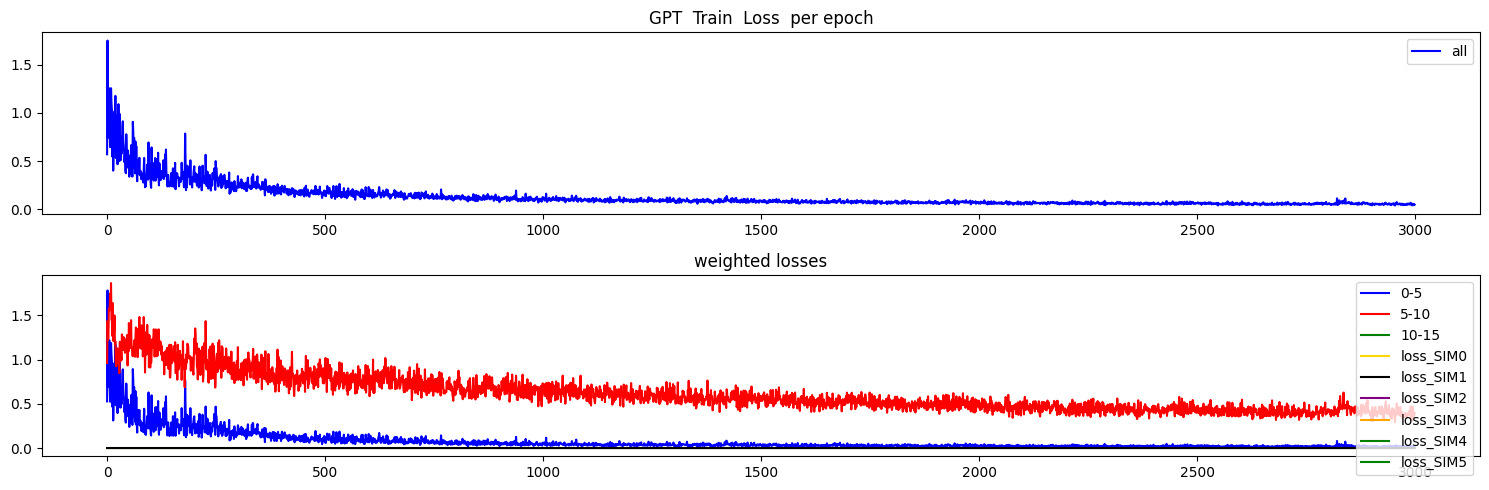

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


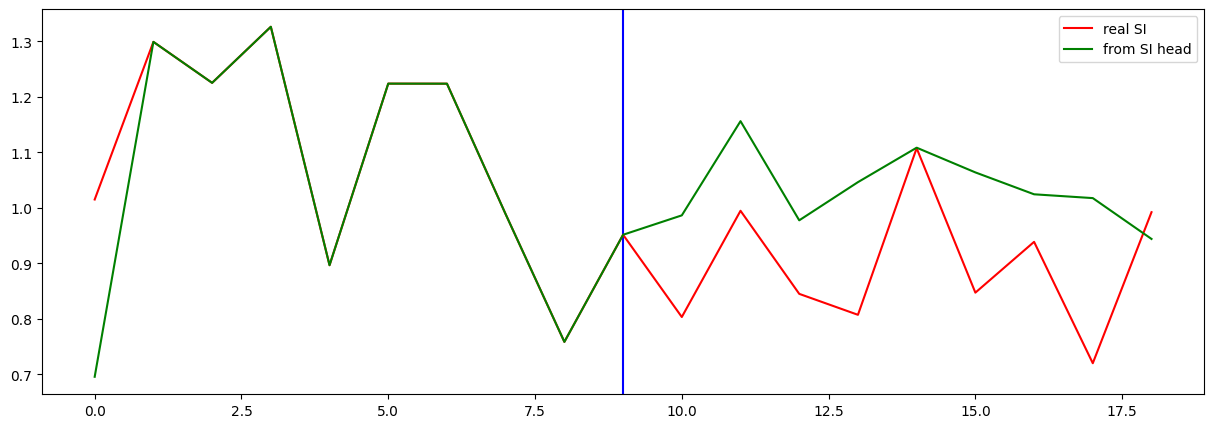

Testing R**2 - (all) - (no inputs):  0.9787575275948777
Testing R**2 - (f2) - SI full (no inputs):  -1.089814660822729
Testing R**2 - SI head only (no inputs):  -1.6222366889725897
0 ...index R**2 (no inputs):  0.06686228069467515
1 ...index R**2 (no inputs):  -0.4414601516205252
2 ...index R**2 (no inputs):  -1.089814660822729
3 ...index R**2 (no inputs):  -1.4685601205428336
4 ...index R**2 (no inputs):  -54.66915750081166
5 ...index R**2 (no inputs):  -96.4130518638818
6 ...index R**2 (no inputs):  -841.3740786366609
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8970194217473901
10 ...index R**2 (no inputs):  -1.3437309289617358
11 ...index R**2 (no inputs):  -289.0256095464375
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.167236477375926
16 ...index R**2 (no inputs):  -0.048289131167893684
17 ...index R**2 (no inputs):  -411.12294884512

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.635869
Loss_SI: 0.5760374069213867 Loss_all: 1.1743574142456055
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.242529
Loss_SI: 0.1812240183353424 Loss_all: 0.7942774891853333
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.213042
Loss_SI: 0.16808007657527924 Loss_all: 0.6177040338516235
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.105577
Loss_SI: 0.054181963205337524 Loss_all: 0.5681344866752625
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.106493
Loss_SI: 0.052892930805683136 Loss_all: 0.588893711566925
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.074657
Loss_SI: 0.032453130930662155 Loss_all: 0.45448756217956543
Prediction shape: torch.Size([32, 35])
===


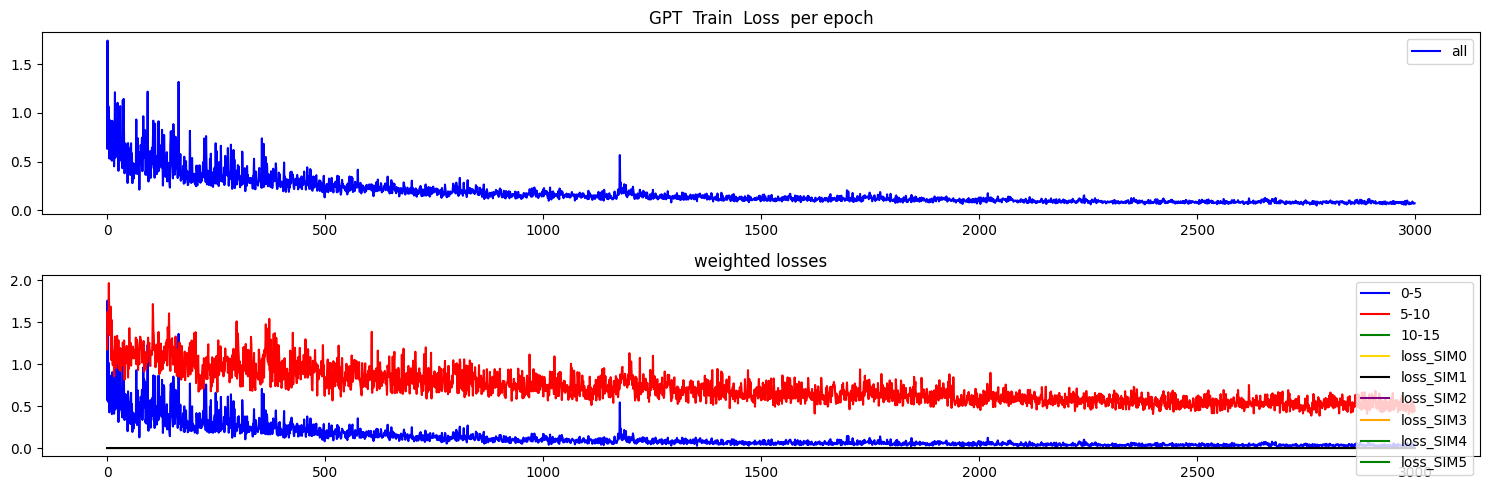

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


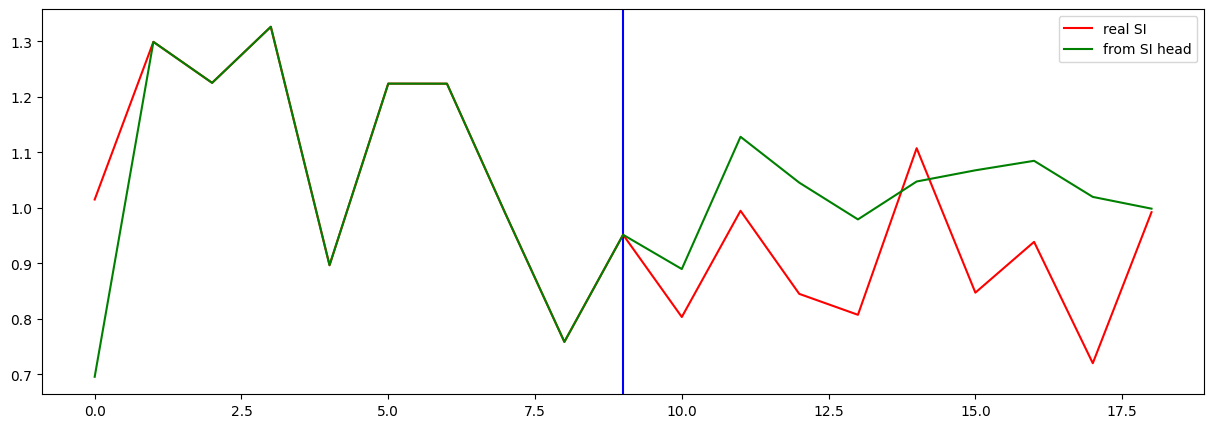

Testing R**2 - (all) - (no inputs):  0.9766315007011552
Testing R**2 - (f2) - SI full (no inputs):  -4.6438893349864925
Testing R**2 - SI head only (no inputs):  -1.9861690479010816
0 ...index R**2 (no inputs):  -1.0962805380339309
1 ...index R**2 (no inputs):  -5.012808142008003
2 ...index R**2 (no inputs):  -4.6438893349864925
3 ...index R**2 (no inputs):  -6.995289206474668
4 ...index R**2 (no inputs):  -884.2206971742286
5 ...index R**2 (no inputs):  -106.4997382875425
6 ...index R**2 (no inputs):  -310.2353411087578
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.04894922177256
10 ...index R**2 (no inputs):  -0.6145970647711345
11 ...index R**2 (no inputs):  -23.667986246403753
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.860729116996152
16 ...index R**2 (no inputs):  -0.15259225620963246
17 ...index R**2 (no inputs):  -212.961183070286

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.730151
Loss_SI: 0.6708644032478333 Loss_all: 1.2637256383895874
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.148694
Loss_SI: 0.09354452788829803 Loss_all: 0.6450389623641968
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.134055
Loss_SI: 0.0855819582939148 Loss_all: 0.5703096985816956
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.154473
Loss_SI: 0.118522047996521 Loss_all: 0.47802695631980896
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.108809
Loss_SI: 0.060973089188337326 Loss_all: 0.5393297672271729
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.101333
Loss_SI: 0.048002250492572784 Loss_all: 0.5813125967979431
Prediction shape: torch.Size([32, 35])
===


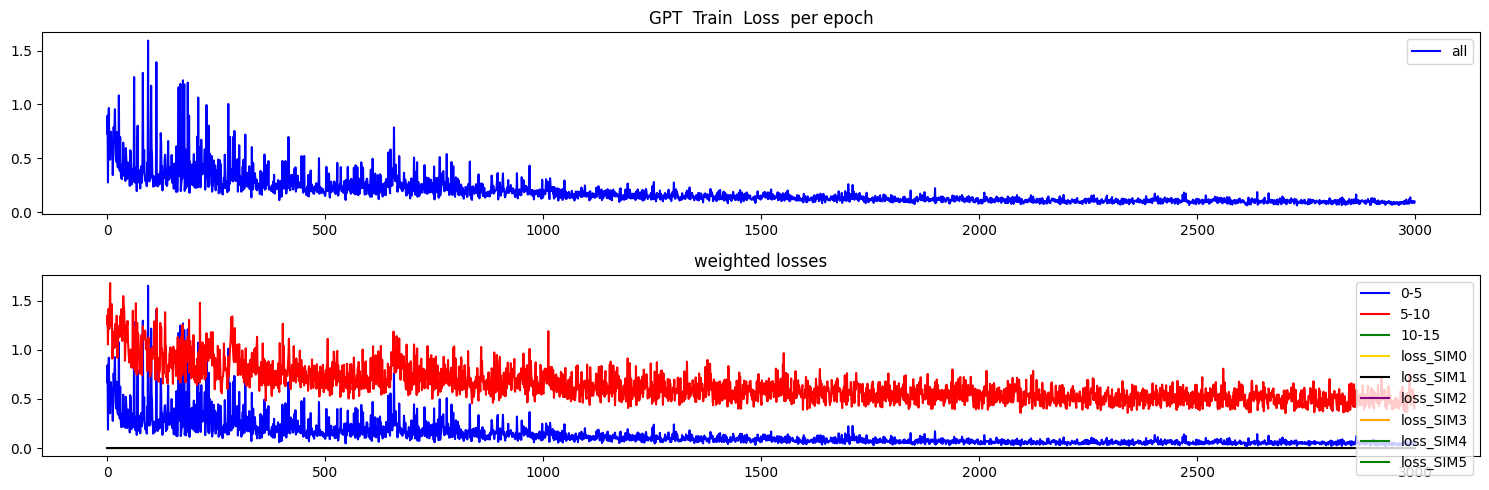

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


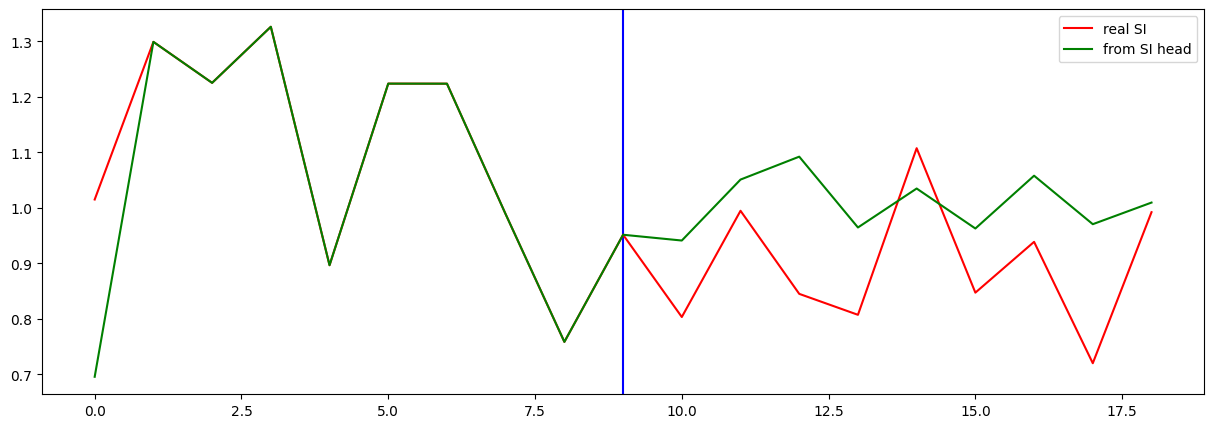

Testing R**2 - (all) - (no inputs):  0.9725564921921638
Testing R**2 - (f2) - SI full (no inputs):  -0.9121222041679238
Testing R**2 - SI head only (no inputs):  -1.5001856195125396
0 ...index R**2 (no inputs):  -0.8029392765205252
1 ...index R**2 (no inputs):  -0.2364682352115115
2 ...index R**2 (no inputs):  -0.9121222041679238
3 ...index R**2 (no inputs):  -8.542271399382779
4 ...index R**2 (no inputs):  -44.7256654217305
5 ...index R**2 (no inputs):  -125.41319889874408
6 ...index R**2 (no inputs):  -1037.1381429487112
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.41577744236618863
10 ...index R**2 (no inputs):  -1.3424076608324746
11 ...index R**2 (no inputs):  -549.8067416416146
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.472170124245173
16 ...index R**2 (no inputs):  -0.930282977655918
17 ...index R**2 (no inputs):  -67.65461878664

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.881936
Loss_SI: 0.8215552568435669 Loss_all: 1.4253650903701782
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.112248
Loss_SI: 0.0417911559343338 Loss_all: 0.7463566064834595
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.052986
Loss_SI: 0.012896789237856865 Loss_all: 0.41378670930862427
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.057019
Loss_SI: 0.019065996631979942 Loss_all: 0.39859235286712646
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041356
Loss_SI: 0.009705744683742523 Loss_all: 0.32620906829833984
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039737
Loss_SI: 0.006530353799462318 Loss_all: 0.3385932445526123
Prediction shape: torch.Size([32, 35])
===


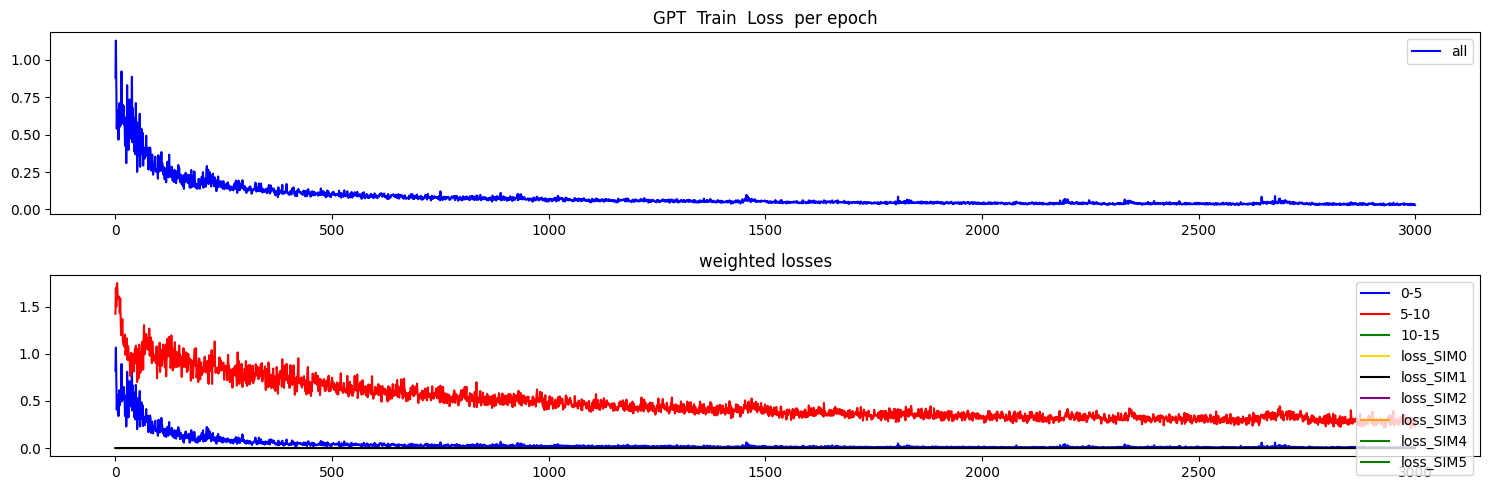

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


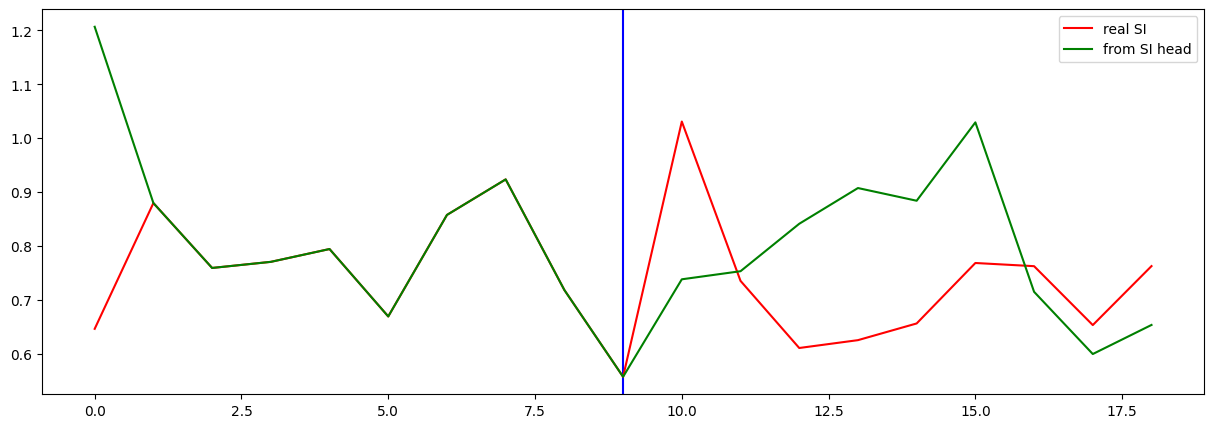

Testing R**2 - (all) - (no inputs):  0.9577140620322837
Testing R**2 - (f2) - SI full (no inputs):  -8.291288028061446
Testing R**2 - SI head only (no inputs):  -6.292437435137255
0 ...index R**2 (no inputs):  -2.5609860994584044
1 ...index R**2 (no inputs):  -2.6084961048612856
2 ...index R**2 (no inputs):  -8.291288028061446
3 ...index R**2 (no inputs):  -1143.3771664510398
4 ...index R**2 (no inputs):  -143.9501166476037
5 ...index R**2 (no inputs):  -6.753331712009106
6 ...index R**2 (no inputs):  -3.1323480480278576
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.230090149722278
10 ...index R**2 (no inputs):  -2.0814567282677885
11 ...index R**2 (no inputs):  -18.782516569061194
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3218812670762863
16 ...index R**2 (no inputs):  -1.5230738573870992
17 ...index R**2 (no inputs):  -20.722248797379

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.923798
Loss_SI: 0.8513668179512024 Loss_all: 1.5756797790527344
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.217525
Loss_SI: 0.13226741552352905 Loss_all: 0.9848386645317078
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.095366
Loss_SI: 0.033426761627197266 Loss_all: 0.6528204679489136
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.063072
Loss_SI: 0.03108281083405018 Loss_all: 0.3509710729122162
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.066886
Loss_SI: 0.023468967527151108 Loss_all: 0.4576405882835388
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.045763
Loss_SI: 0.015443257987499237 Loss_all: 0.3186361491680145
Prediction shape: torch.Size([32, 35])
===


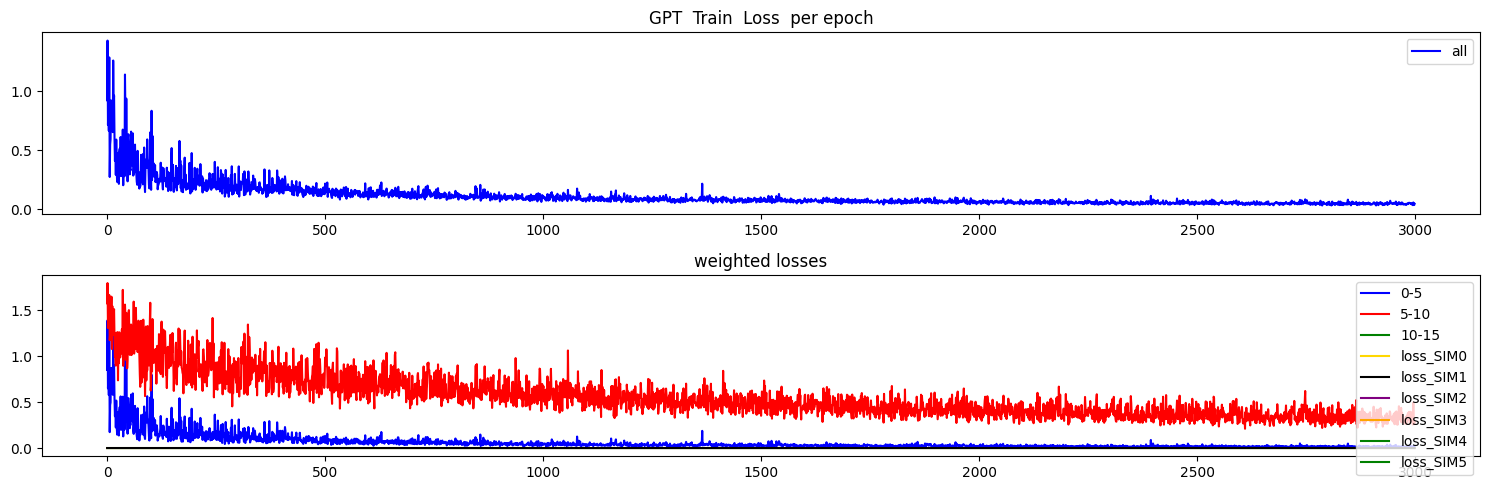

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


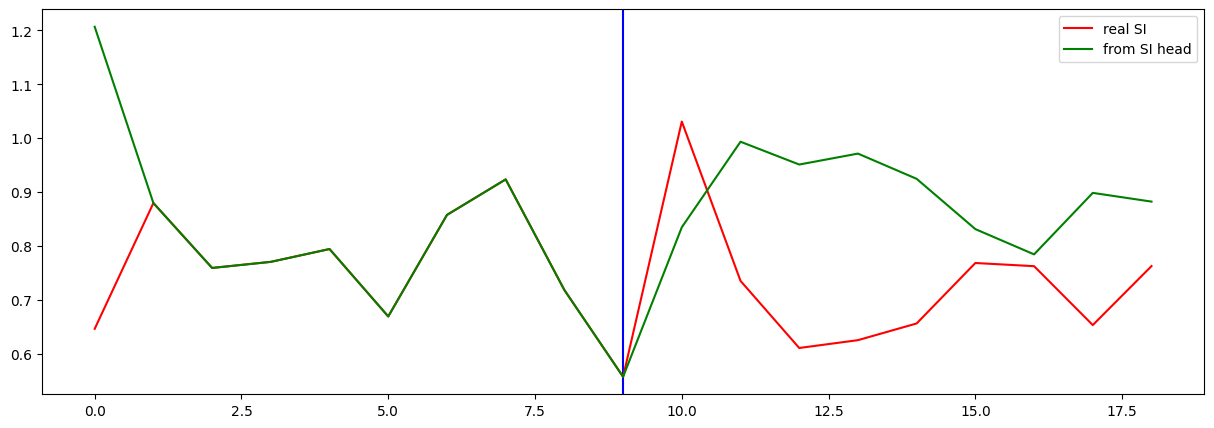

Testing R**2 - (all) - (no inputs):  0.978091744610283
Testing R**2 - (f2) - SI full (no inputs):  -20.14648235943839
Testing R**2 - SI head only (no inputs):  -13.352955443142633
0 ...index R**2 (no inputs):  -3.184810733797371
1 ...index R**2 (no inputs):  -5.433374566908992
2 ...index R**2 (no inputs):  -20.14648235943839
3 ...index R**2 (no inputs):  -430.7966904721459
4 ...index R**2 (no inputs):  -6.465766397759021
5 ...index R**2 (no inputs):  -3.0169594781986024
6 ...index R**2 (no inputs):  -0.6754910389483586
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0224414737690277
10 ...index R**2 (no inputs):  -1.3047805801314278
11 ...index R**2 (no inputs):  -7.9970285750947685
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.667507767846815
16 ...index R**2 (no inputs):  -3.3432743658674484
17 ...index R**2 (no inputs):  -11.13560144311376

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.702138
Loss_SI: 0.6545030474662781 Loss_all: 1.1308555603027344
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.160644
Loss_SI: 0.08880548179149628 Loss_all: 0.8071903586387634
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.147122
Loss_SI: 0.10903206467628479 Loss_all: 0.48993006348609924
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.111663
Loss_SI: 0.061192430555820465 Loss_all: 0.5658937096595764
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.084852
Loss_SI: 0.03627895191311836 Loss_all: 0.52201247215271
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.077653
Loss_SI: 0.03288909047842026 Loss_all: 0.48052680492401123
Prediction shape: torch.Size([32, 35])
===


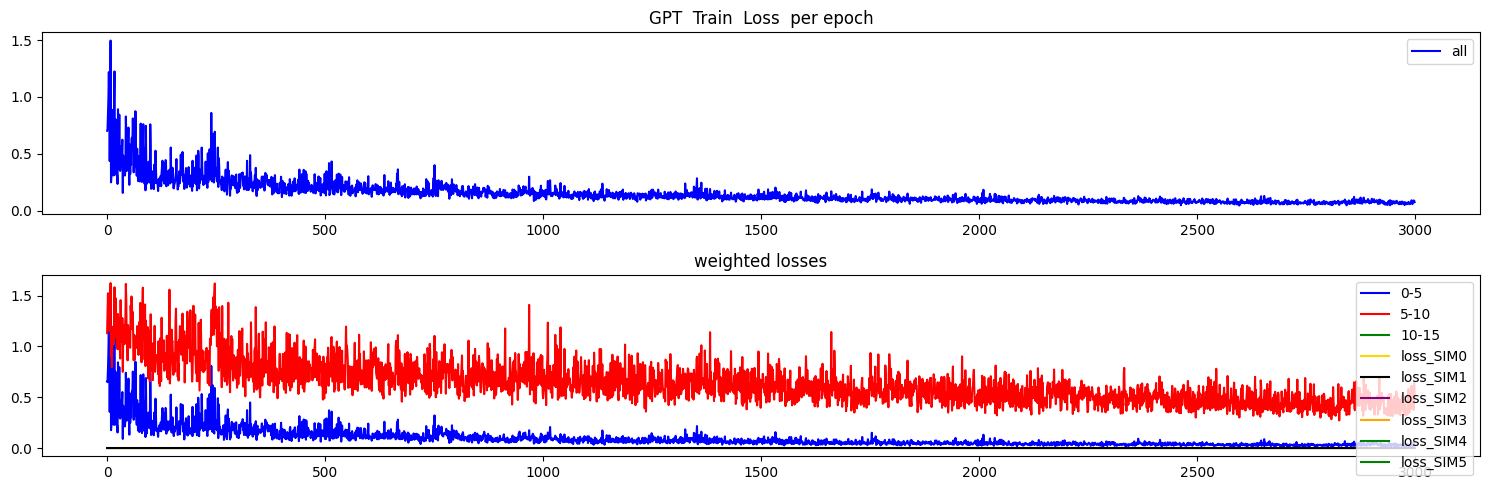

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


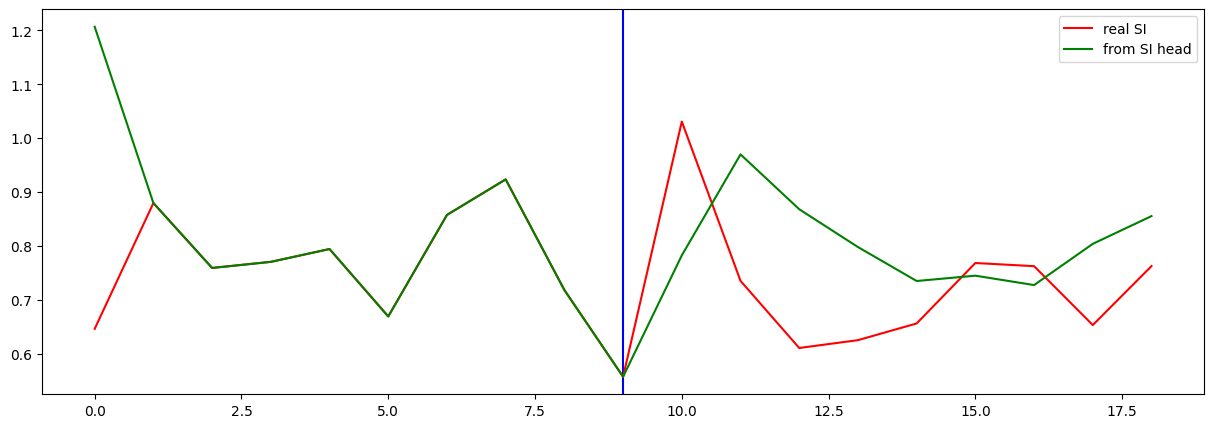

Testing R**2 - (all) - (no inputs):  0.9882091756053587
Testing R**2 - (f2) - SI full (no inputs):  -6.316657339032408
Testing R**2 - SI head only (no inputs):  -6.81930296003043
0 ...index R**2 (no inputs):  -2.2167530308173267
1 ...index R**2 (no inputs):  -3.3303327327553207
2 ...index R**2 (no inputs):  -6.316657339032408
3 ...index R**2 (no inputs):  -254.65505185282709
4 ...index R**2 (no inputs):  -6.112078915919351
5 ...index R**2 (no inputs):  -1.1504361118850817
6 ...index R**2 (no inputs):  0.01157459931342042
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.3684577343771056
10 ...index R**2 (no inputs):  0.11633235117368534
11 ...index R**2 (no inputs):  -84.42308308925622
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.305878368133143
16 ...index R**2 (no inputs):  -2.4785672221289685
17 ...index R**2 (no inputs):  -77.1864900587513

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.611856
Loss_SI: 0.5406605005264282 Loss_all: 1.2526119947433472
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.177524
Loss_SI: 0.11365589499473572 Loss_all: 0.7523339986801147
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.107361
Loss_SI: 0.06380223482847214 Loss_all: 0.49939340353012085
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.154919
Loss_SI: 0.08671287447214127 Loss_all: 0.7687739729881287
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.097595
Loss_SI: 0.05460745468735695 Loss_all: 0.48447805643081665
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.100629
Loss_SI: 0.06024348363280296 Loss_all: 0.464103639125824
Prediction shape: torch.Size([32, 35])
===


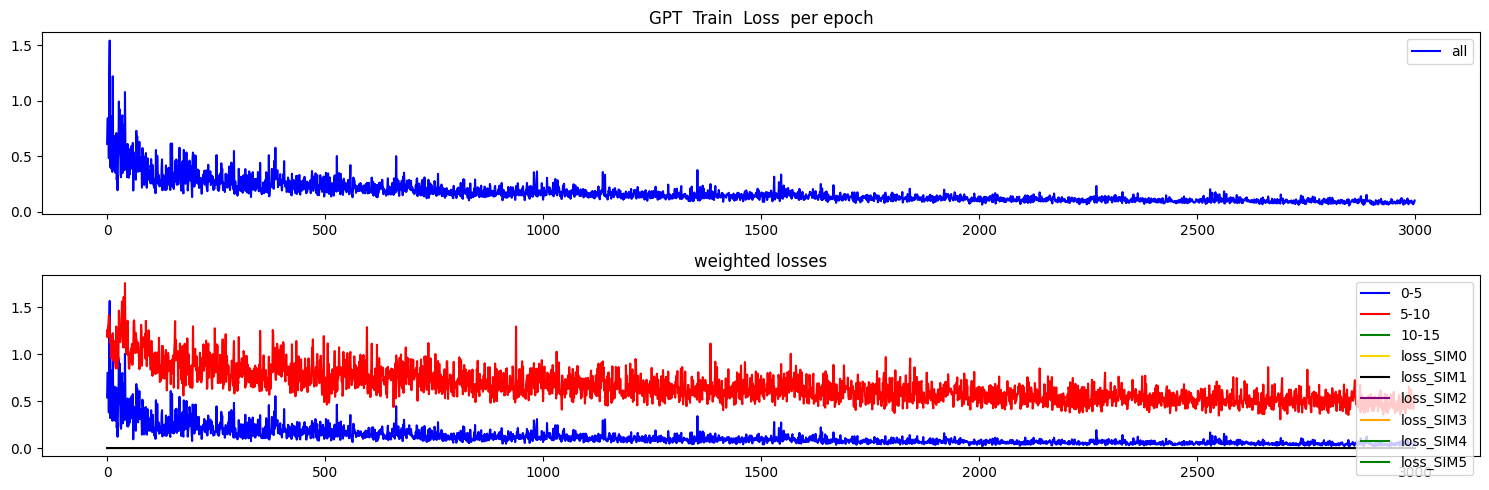

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


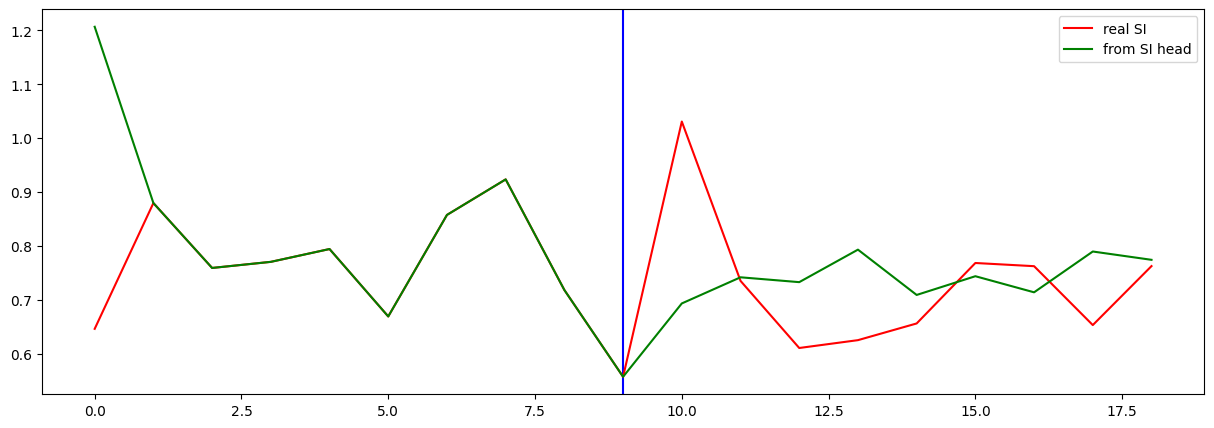

Testing R**2 - (all) - (no inputs):  0.9902992053096648
Testing R**2 - (f2) - SI full (no inputs):  -5.860286158097051
Testing R**2 - SI head only (no inputs):  -1.201536518818989
0 ...index R**2 (no inputs):  -0.030221258532303397
1 ...index R**2 (no inputs):  -3.753400324567089
2 ...index R**2 (no inputs):  -5.860286158097051
3 ...index R**2 (no inputs):  -77.95236193429369
4 ...index R**2 (no inputs):  -52.54358816143394
5 ...index R**2 (no inputs):  -0.7703322671250163
6 ...index R**2 (no inputs):  0.23012701517241552
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8173851977012951
10 ...index R**2 (no inputs):  -0.3460238477986224
11 ...index R**2 (no inputs):  -132.57750901760346
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9705686093331813
16 ...index R**2 (no inputs):  -1.4039717753940204
17 ...index R**2 (no inputs):  -63.9372962496

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.736652
Loss_SI: 0.6634193658828735 Loss_all: 1.3957418203353882
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.154014
Loss_SI: 0.09737922996282578 Loss_all: 0.6637304425239563
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.065910
Loss_SI: 0.02245141565799713 Loss_all: 0.45704135298728943
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.055946
Loss_SI: 0.015138097107410431 Loss_all: 0.4232141971588135
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.059957
Loss_SI: 0.01760724000632763 Loss_all: 0.4411071836948395
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.032359
Loss_SI: 0.00852879136800766 Loss_all: 0.24682939052581787
Prediction shape: torch.Size([32, 35])
===


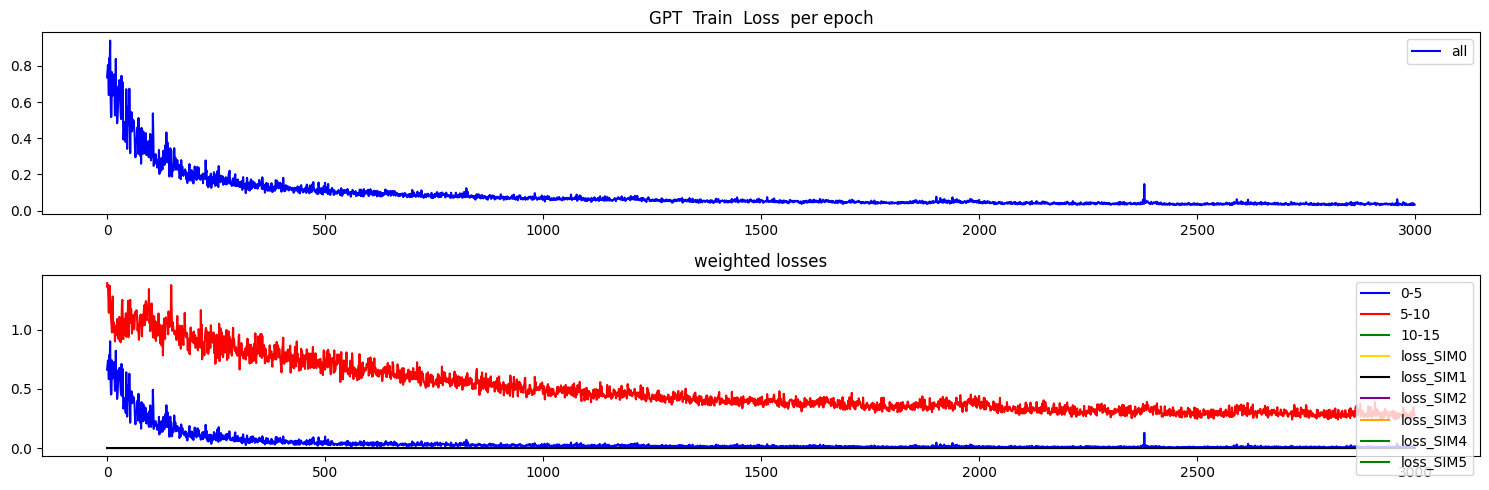

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


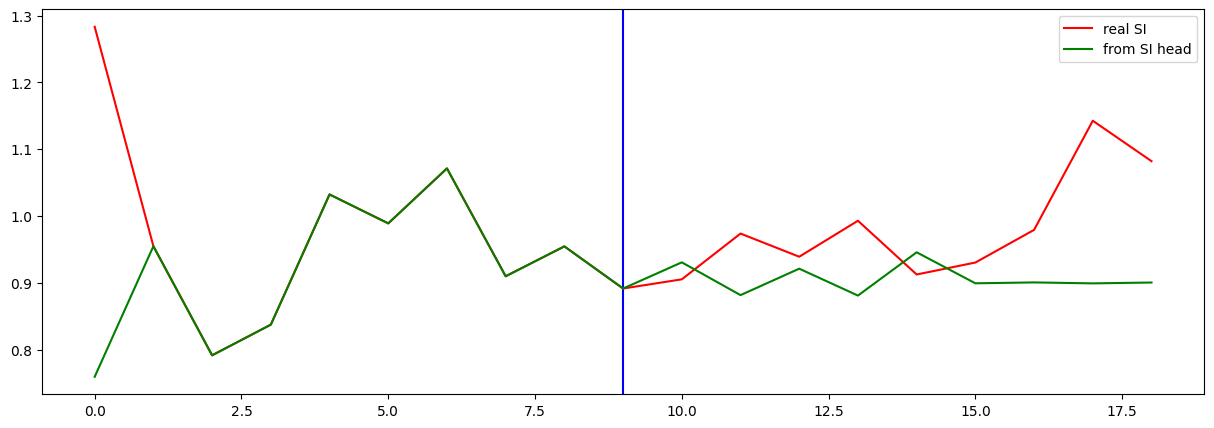

Testing R**2 - (all) - (no inputs):  0.9986056435177446
Testing R**2 - (f2) - SI full (no inputs):  -0.8326380609901067
Testing R**2 - SI head only (no inputs):  -1.1638485136249677
0 ...index R**2 (no inputs):  0.08348069252794432
1 ...index R**2 (no inputs):  -0.49588459156131637
2 ...index R**2 (no inputs):  -0.8326380609901067
3 ...index R**2 (no inputs):  -283.7063560245273
4 ...index R**2 (no inputs):  -2.6586895279093596
5 ...index R**2 (no inputs):  -3.3475249466072174
6 ...index R**2 (no inputs):  -146.86117043784418
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.07679069756949675
10 ...index R**2 (no inputs):  0.6853992431036506
11 ...index R**2 (no inputs):  -218.93086532405866
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6328801535030113
16 ...index R**2 (no inputs):  -0.6160225039094074
17 ...index R**2 (no inputs):  -73.6707253

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.506777
Loss_SI: 0.4392964839935303 Loss_all: 1.1140971183776855
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.127146
Loss_SI: 0.060974329710006714 Loss_all: 0.722688615322113
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.092145
Loss_SI: 0.04290647804737091 Loss_all: 0.5352925062179565
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.067657
Loss_SI: 0.0224619023501873 Loss_all: 0.47441649436950684
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.065880
Loss_SI: 0.01634853705763817 Loss_all: 0.5116613507270813
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.052663
Loss_SI: 0.01564161479473114 Loss_all: 0.38585805892944336
Prediction shape: torch.Size([32, 35])
===


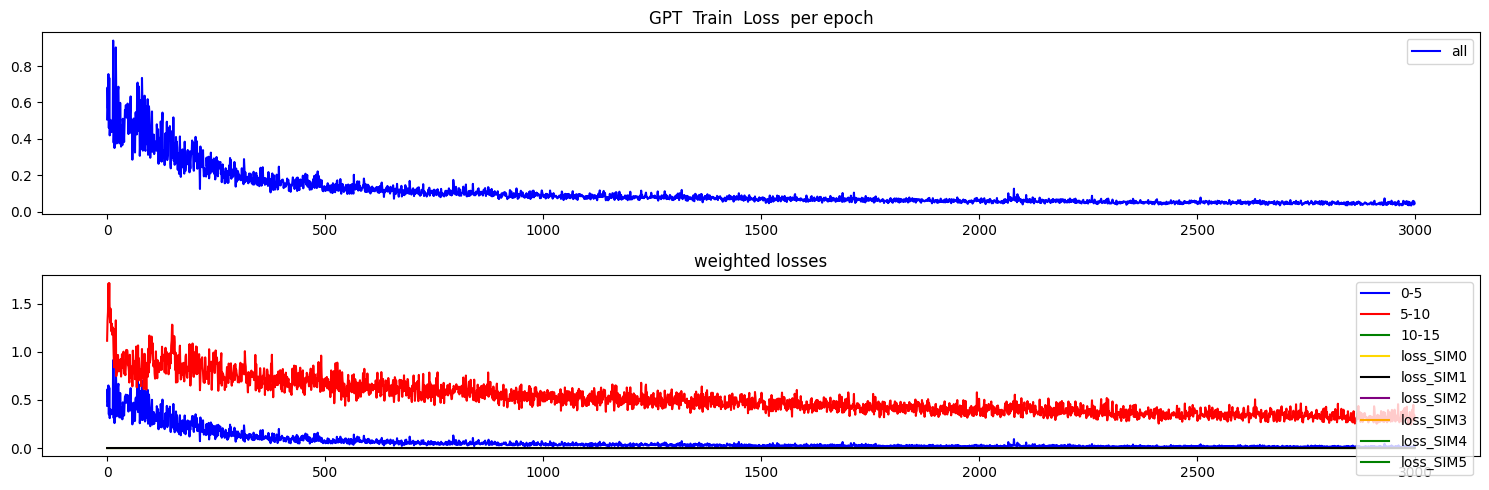

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


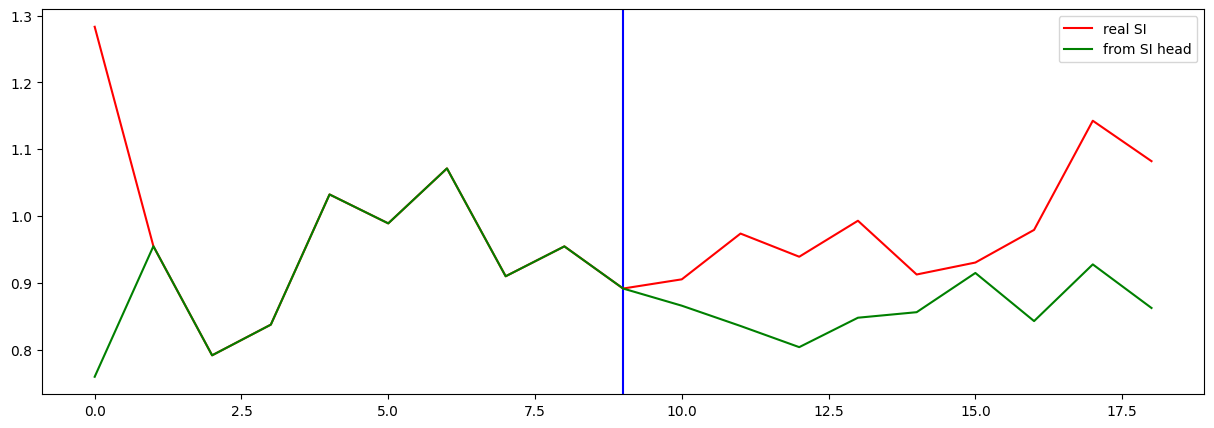

Testing R**2 - (all) - (no inputs):  0.9983336749452387
Testing R**2 - (f2) - SI full (no inputs):  -1.3074754930547057
Testing R**2 - SI head only (no inputs):  -2.0627969639018744
0 ...index R**2 (no inputs):  -2.6819946853454364
1 ...index R**2 (no inputs):  -0.4067451278086063
2 ...index R**2 (no inputs):  -1.3074754930547057
3 ...index R**2 (no inputs):  -64.1093804169155
4 ...index R**2 (no inputs):  -48.14330113359962
5 ...index R**2 (no inputs):  -4.184238771666524
6 ...index R**2 (no inputs):  -176.88890720844486
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4882669767237562
10 ...index R**2 (no inputs):  0.2858215401116335
11 ...index R**2 (no inputs):  -180.51197481691162
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6717276413090199
16 ...index R**2 (no inputs):  -0.4223361209439962
17 ...index R**2 (no inputs):  -52.07500364486

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.020280
Loss_SI: 0.9830775260925293 Loss_all: 1.355105996131897
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.233340
Loss_SI: 0.14780402183532715 Loss_all: 1.003164529800415
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.174464
Loss_SI: 0.11797038465738297 Loss_all: 0.6829016804695129
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.082561
Loss_SI: 0.040172774344682693 Loss_all: 0.46405813097953796
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.087598
Loss_SI: 0.03578513115644455 Loss_all: 0.5539138913154602
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.084854
Loss_SI: 0.02919619530439377 Loss_all: 0.5857776403427124
Prediction shape: torch.Size([32, 35])
===


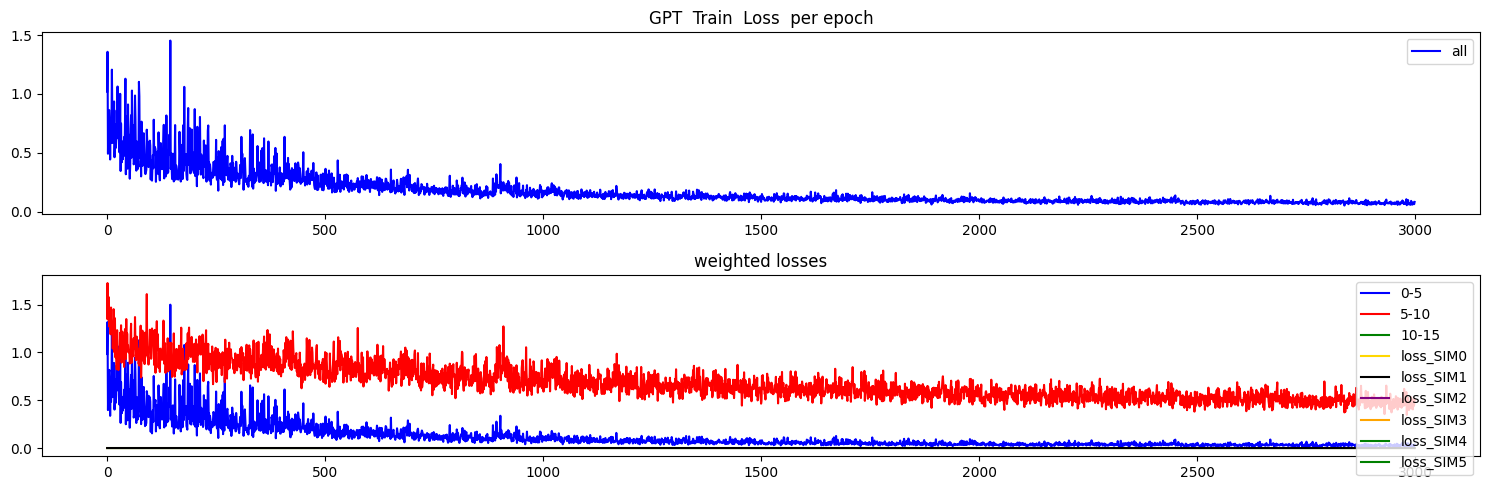

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


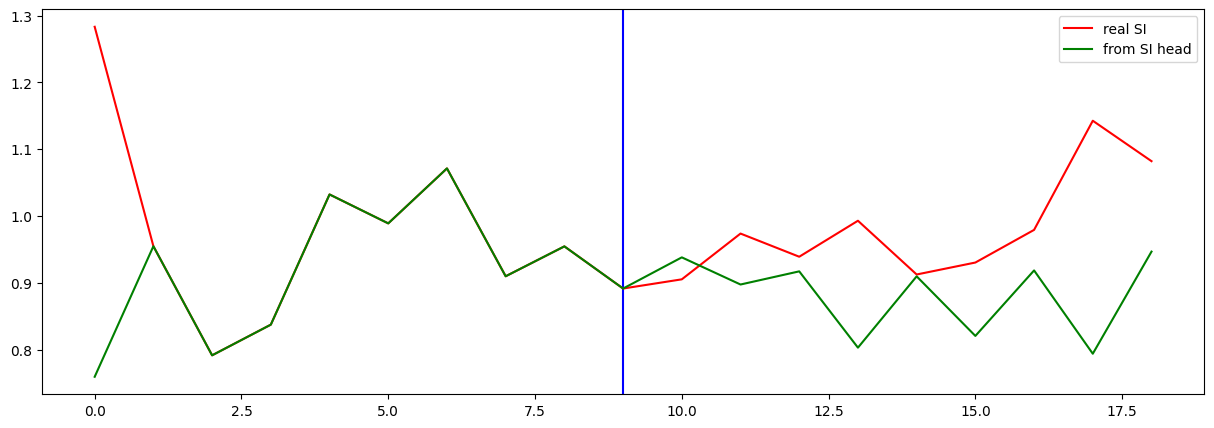

Testing R**2 - (all) - (no inputs):  0.9947202039711447
Testing R**2 - (f2) - SI full (no inputs):  -1.7553650018488658
Testing R**2 - SI head only (no inputs):  -1.470799529771262
0 ...index R**2 (no inputs):  0.07621842884294949
1 ...index R**2 (no inputs):  0.100878871317435
2 ...index R**2 (no inputs):  -1.7553650018488658
3 ...index R**2 (no inputs):  -11.273163240569376
4 ...index R**2 (no inputs):  -4.381841726931533
5 ...index R**2 (no inputs):  -15.72561280187966
6 ...index R**2 (no inputs):  -187.03203144195535
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22755062003761584
10 ...index R**2 (no inputs):  0.20345706524879326
11 ...index R**2 (no inputs):  -30.847362394736734
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.821369267502508
16 ...index R**2 (no inputs):  -0.17532963724235318
17 ...index R**2 (no inputs):  -44.6029417502

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.475606
Loss_SI: 0.3767518997192383 Loss_all: 1.3652929067611694
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.229050
Loss_SI: 0.18910980224609375 Loss_all: 0.5885128974914551
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.180392
Loss_SI: 0.13238120079040527 Loss_all: 0.6124927401542664
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.111236
Loss_SI: 0.06373228132724762 Loss_all: 0.5387712717056274
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.125436
Loss_SI: 0.0730842724442482 Loss_all: 0.5966035723686218
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.101287
Loss_SI: 0.035439297556877136 Loss_all: 0.6939161419868469
Prediction shape: torch.Size([32, 35])
===


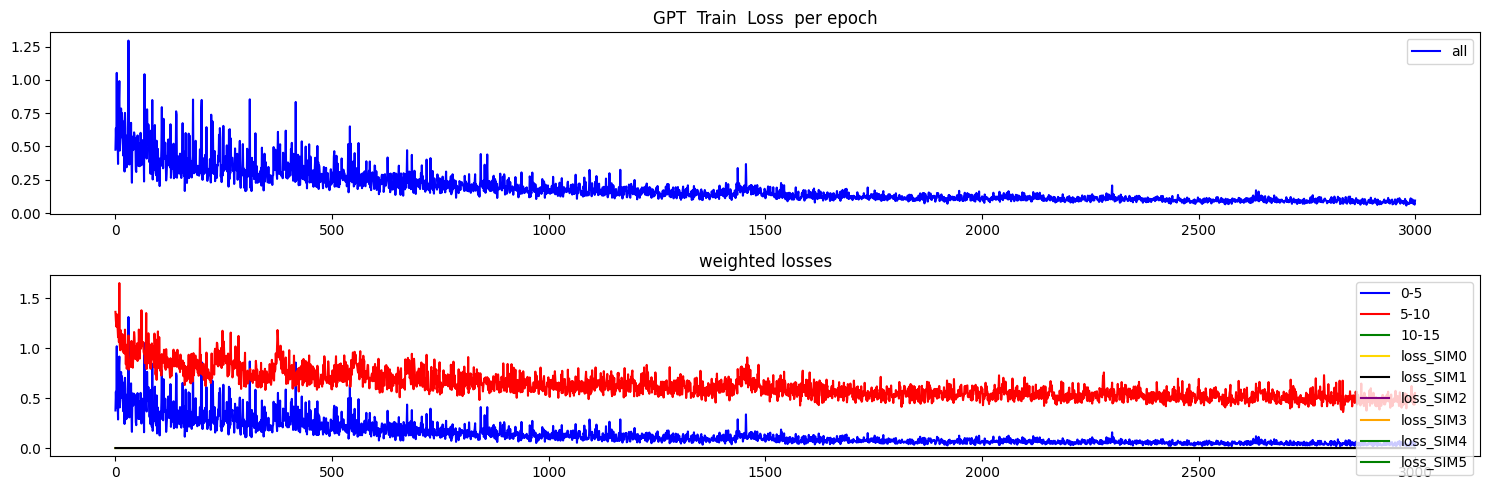

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


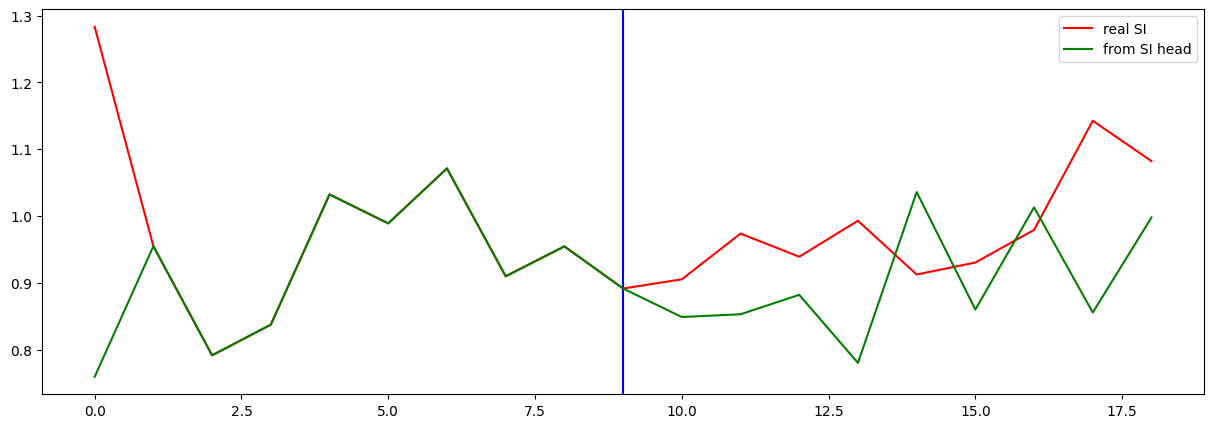

Testing R**2 - (all) - (no inputs):  0.9984609648006512
Testing R**2 - (f2) - SI full (no inputs):  -1.4239128926900837
Testing R**2 - SI head only (no inputs):  -0.9215488252661364
0 ...index R**2 (no inputs):  -0.8320998019174857
1 ...index R**2 (no inputs):  -0.7853142245774072
2 ...index R**2 (no inputs):  -1.4239128926900837
3 ...index R**2 (no inputs):  -797.1230705691784
4 ...index R**2 (no inputs):  -40.99241255881028
5 ...index R**2 (no inputs):  -3.704306000981619
6 ...index R**2 (no inputs):  -1204.8269991253985
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.33454158428421454
10 ...index R**2 (no inputs):  0.0633370325390823
11 ...index R**2 (no inputs):  -433.4863607717883
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.370370844990866
16 ...index R**2 (no inputs):  -0.14988410317957968
17 ...index R**2 (no inputs):  -171.90602453

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.15713451745234797


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.14864821266111783


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.3130193033253129


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.34624323961682135



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.49955815937990966
2 .....R² on first n steps: -0.1907157936266617
3 .....R² on first n steps: -0.587002900441822
4 .....R² on first n steps: 0.12142117521632145
5 .....R² on first n steps: 0.1436541080671292
6 .....R² on first n steps: 0.02506650679578326
7 .....R² on first n steps: 0.04435923943409781
8 .....R² on first n steps: 0.03991319025295048
9 .....R² on first n steps: 0.15713451745234797


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.5613531047162501
2 .....R² on first n steps: -1.037634916562225
3 .....R² on first n steps: -1.0599940583740897
4 .....R² on first n steps: -0.130677951492711
5 .....R² on first n steps: -0.040353249716391204
6 .....R² on first n steps: -0.02818061221503876
7 .....R² on first n steps: 0.07795342250025639
8 .....R² on first n steps: 0.10720626006733736
9 .....R² on first n steps: 0.14864821266111783


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.3805448755829034
2 .....R² on first n steps: -0.8323043788865929
3 .....R² on first n steps: -0.721419545996796
4 .....R² on first n steps: 0.06662016440387064
5 .....R² on first n steps: 0.2012151660569642
6 .....R² on first n steps: 0.20849574230272172
7 .....R² on first n steps: 0.28153736403324503
8 .....R² on first n steps: 0.2634925053412528
9 .....R² on first n steps: 0.3130193033253129


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.5264560618509075
2 .....R² on first n steps: -0.23418926185281874
3 .....R² on first n steps: -0.26923370820223025
4 .....R² on first n steps: 0.28167573915986677
5 .....R² on first n steps: 0.33887234218931306
6 .....R² on first n steps: 0.3616693903163234
7 .....R² on first n steps: 0.39235632809701015
8 .....R² on first n steps: 0.37407959659122136
9 .....R² on first n steps: 0.34624323961682135



## Plot


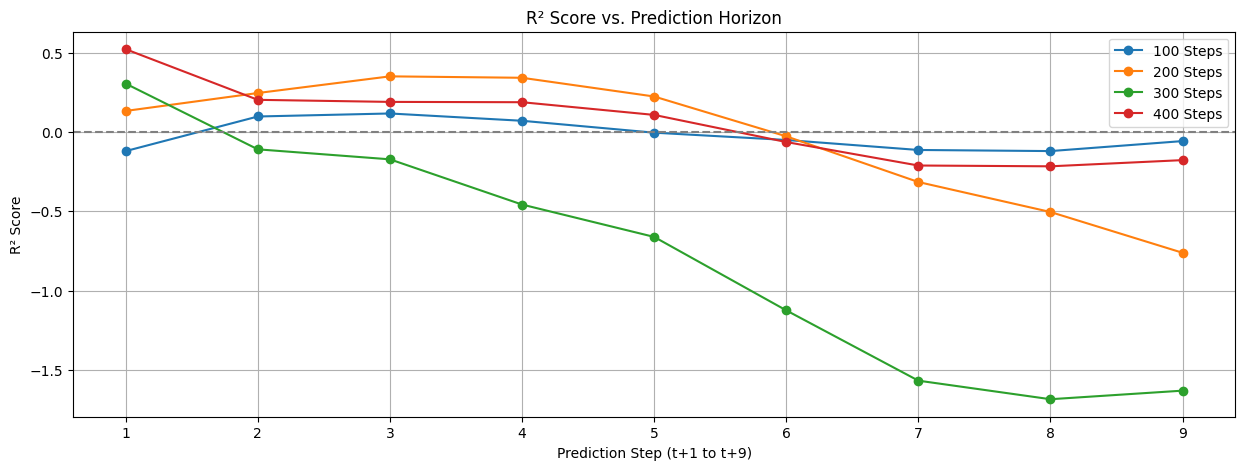

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
